In [ ]:
from feature_functions import *
import math

In [ ]:
def rateOfInversions(data, time):
    maximum = argrelextrema(np.array(data), np.greater)    
    return (len(maximum[0]) / (max(time) - min(time)))

In [ ]:
controlFiles, patientFiles = fileClassification()

1105
1530
2135
1295
843
1272
1112
2579
2890
2435
2727
1297
562
730
1179


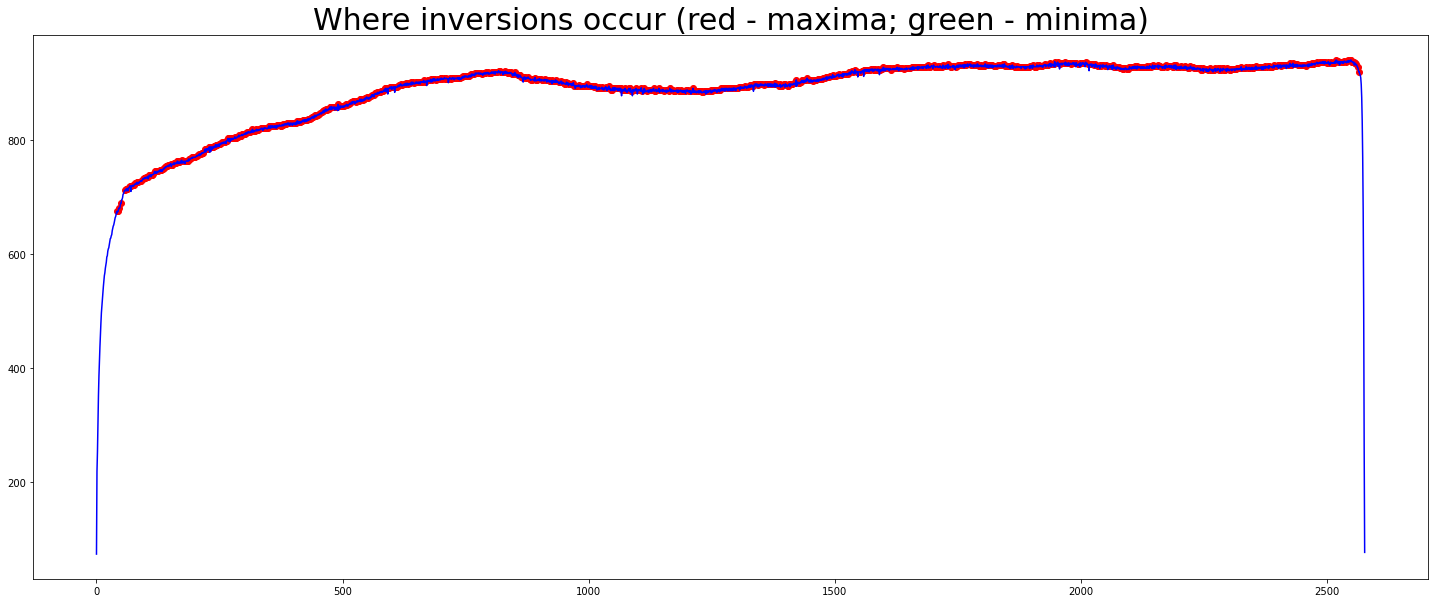

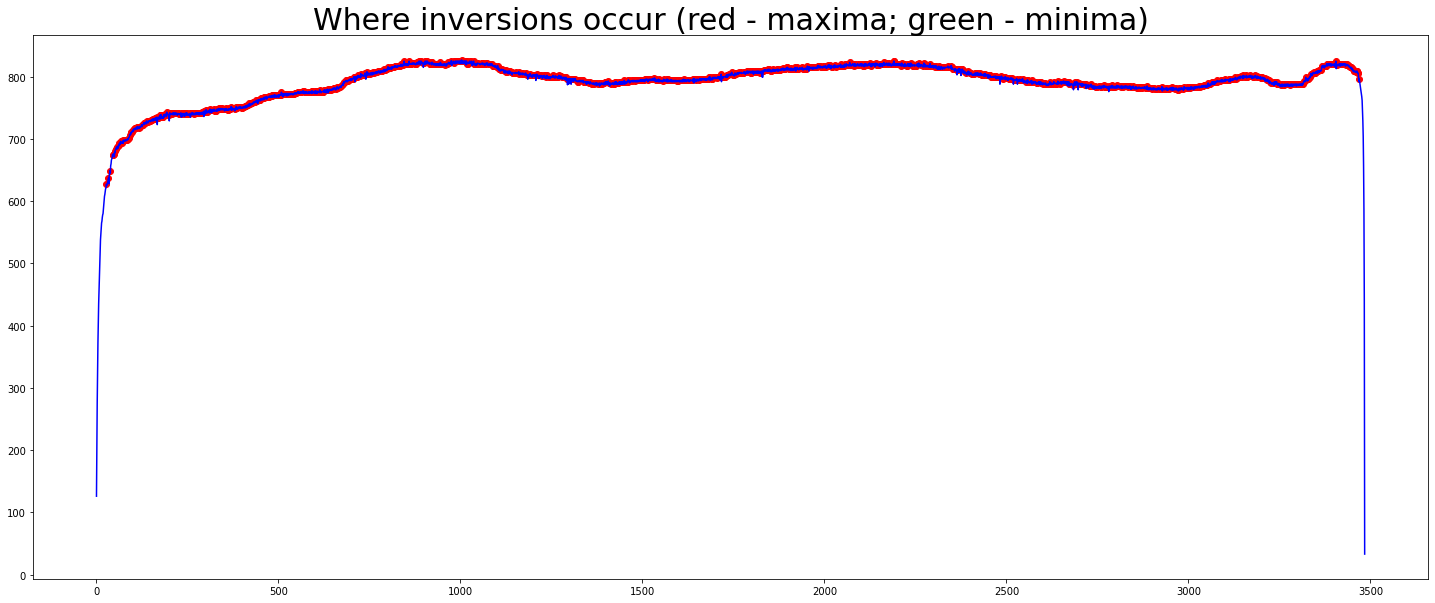

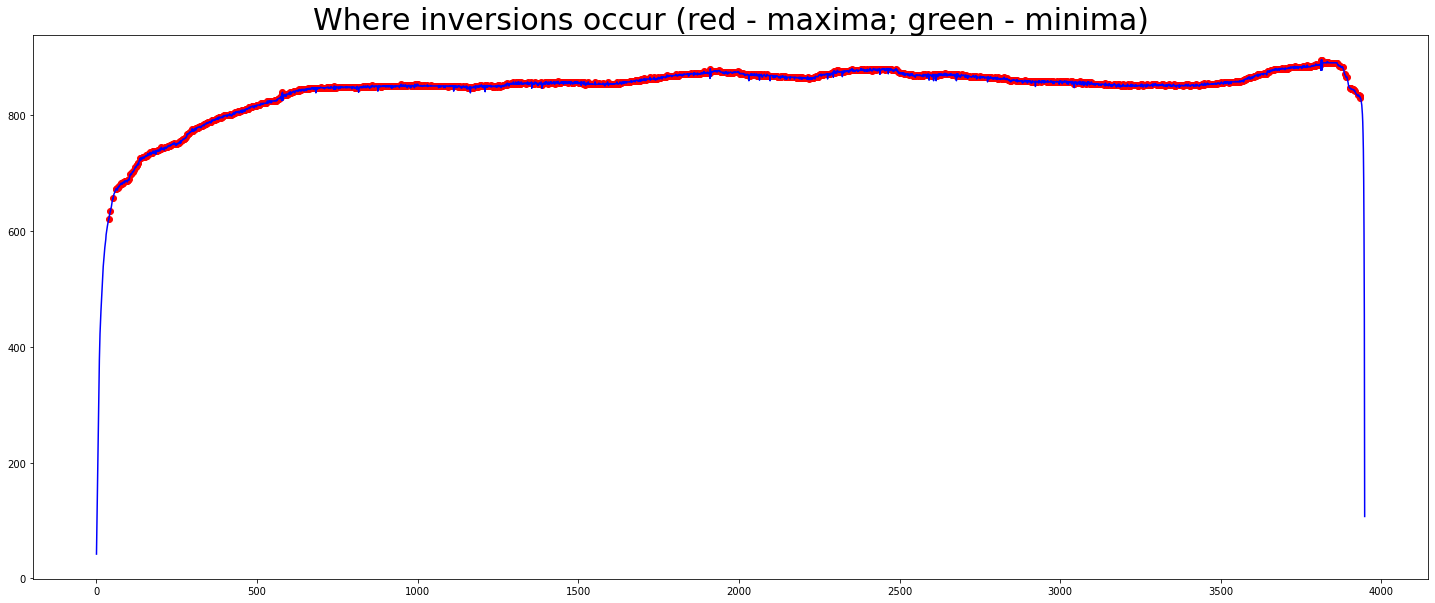

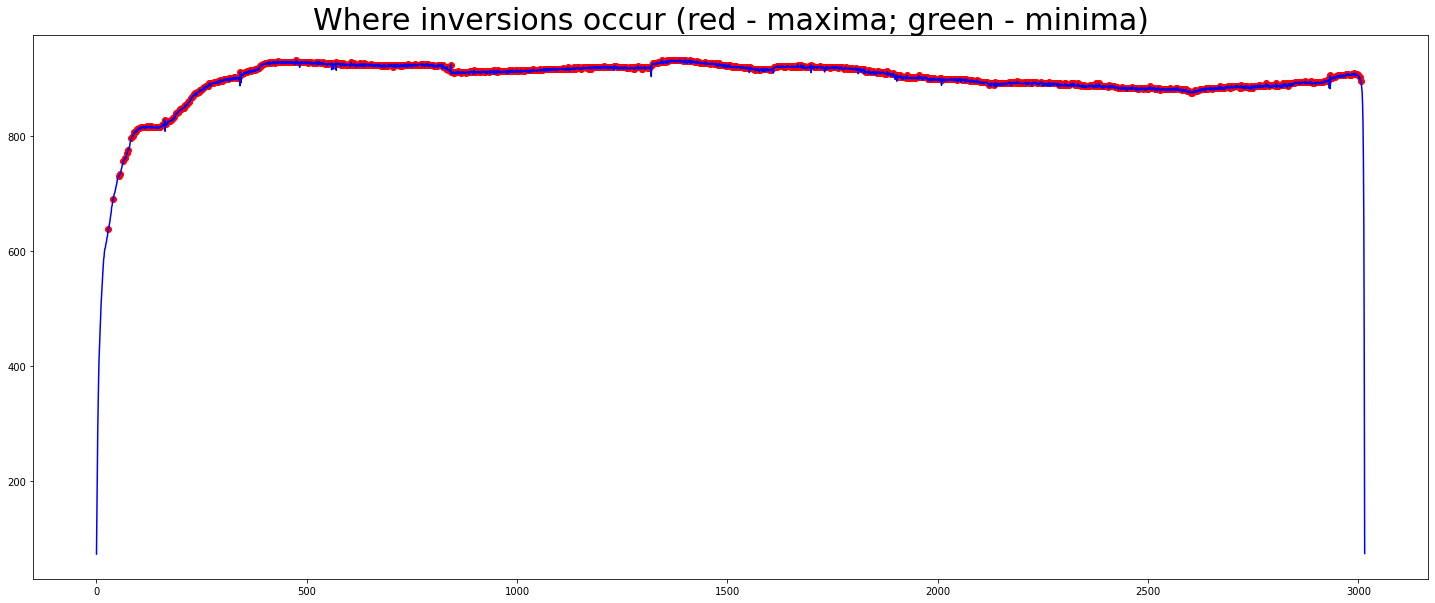

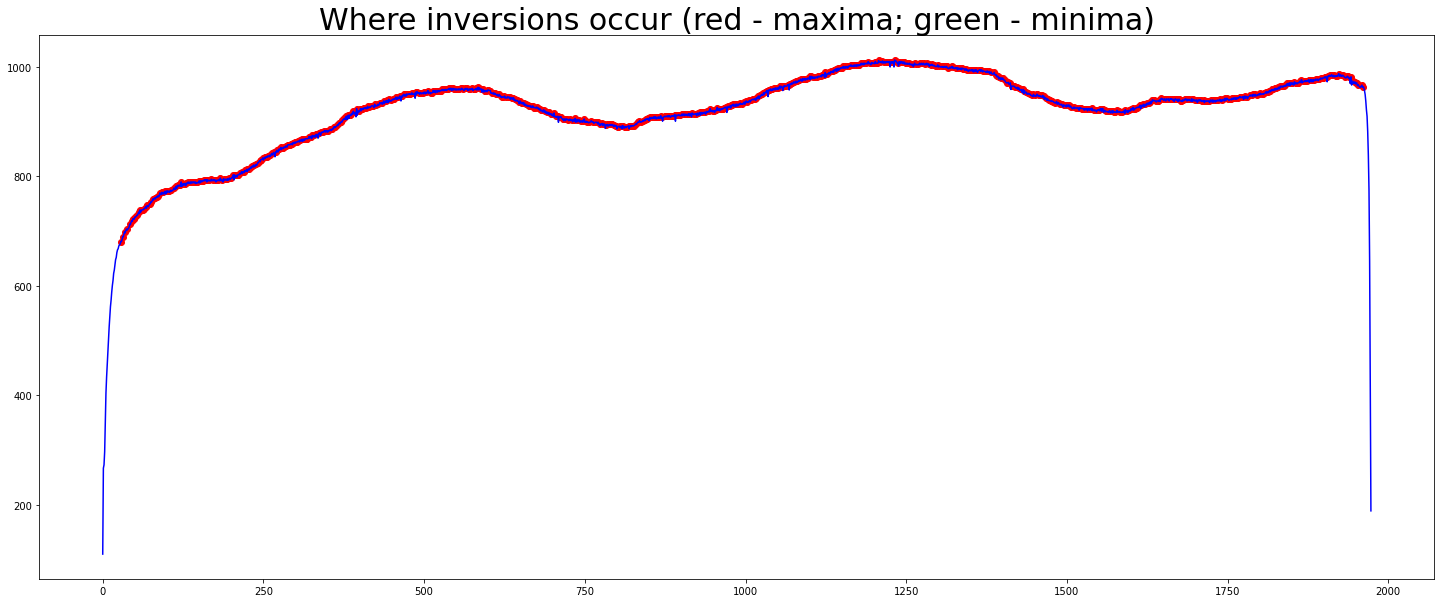

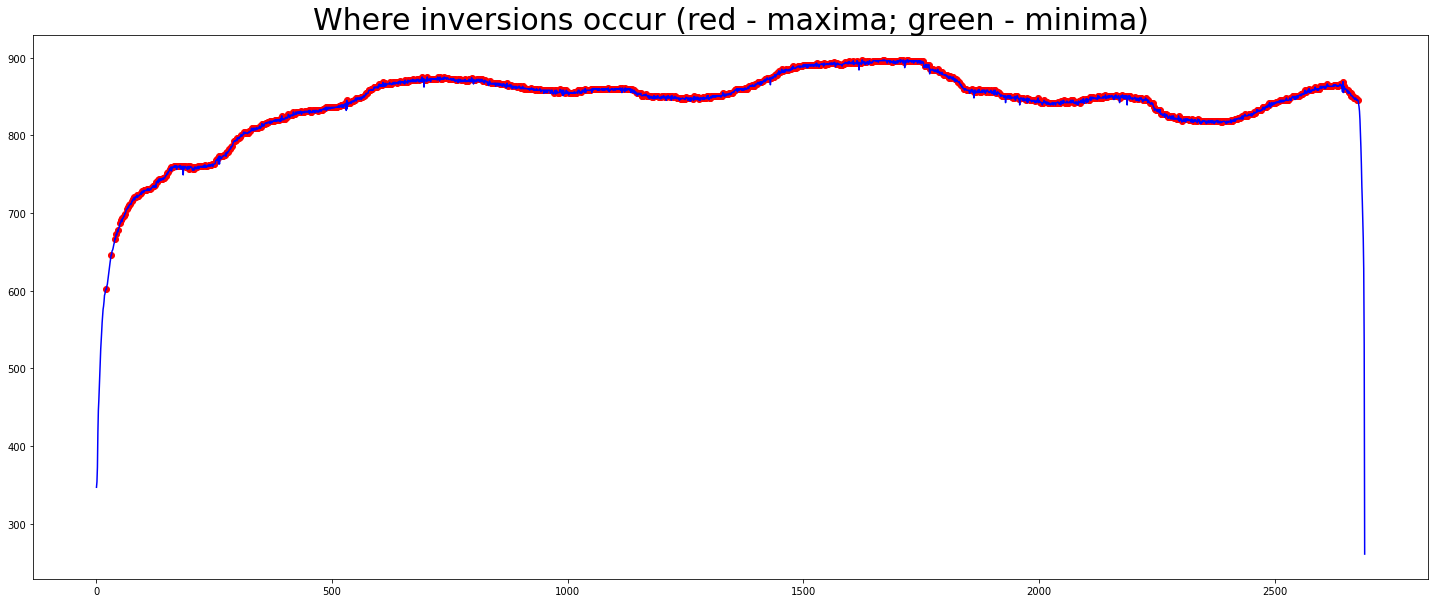

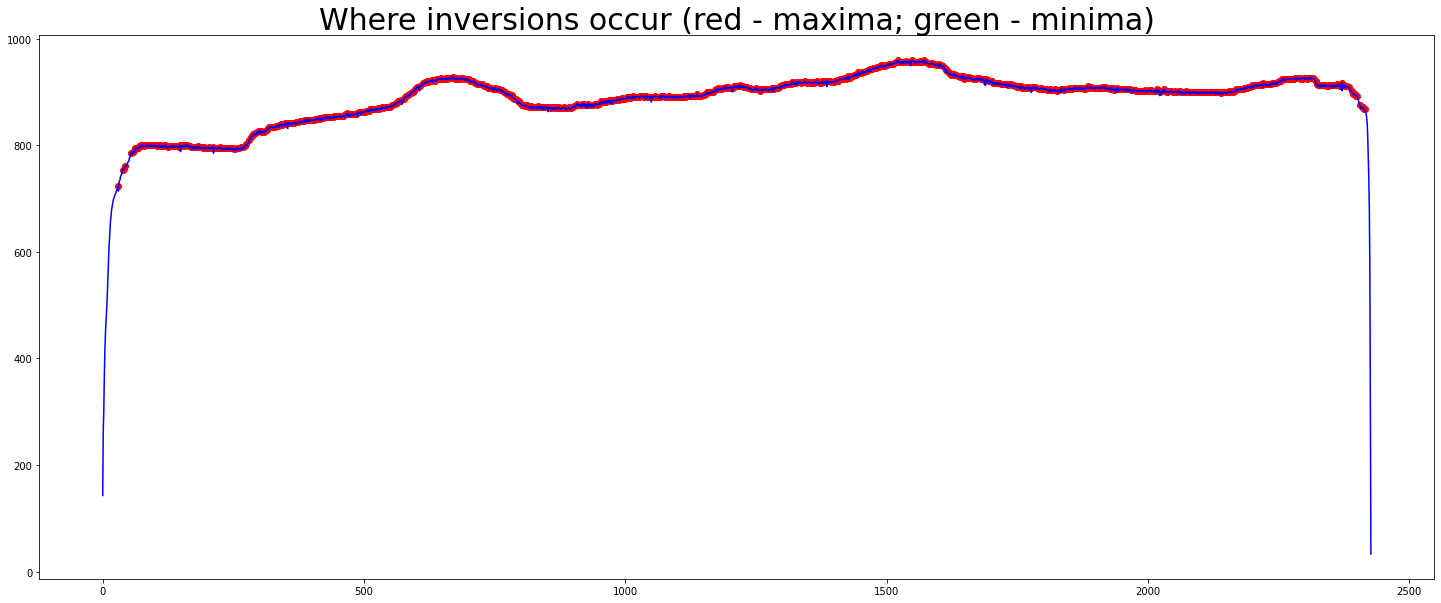

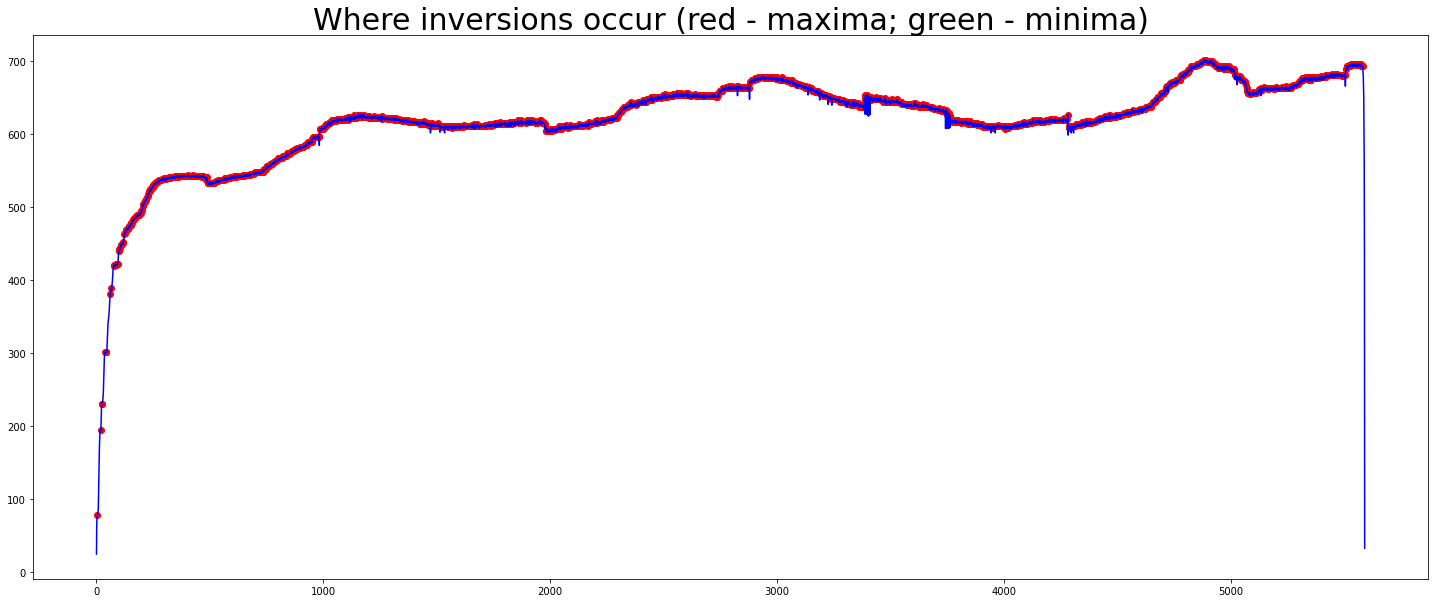

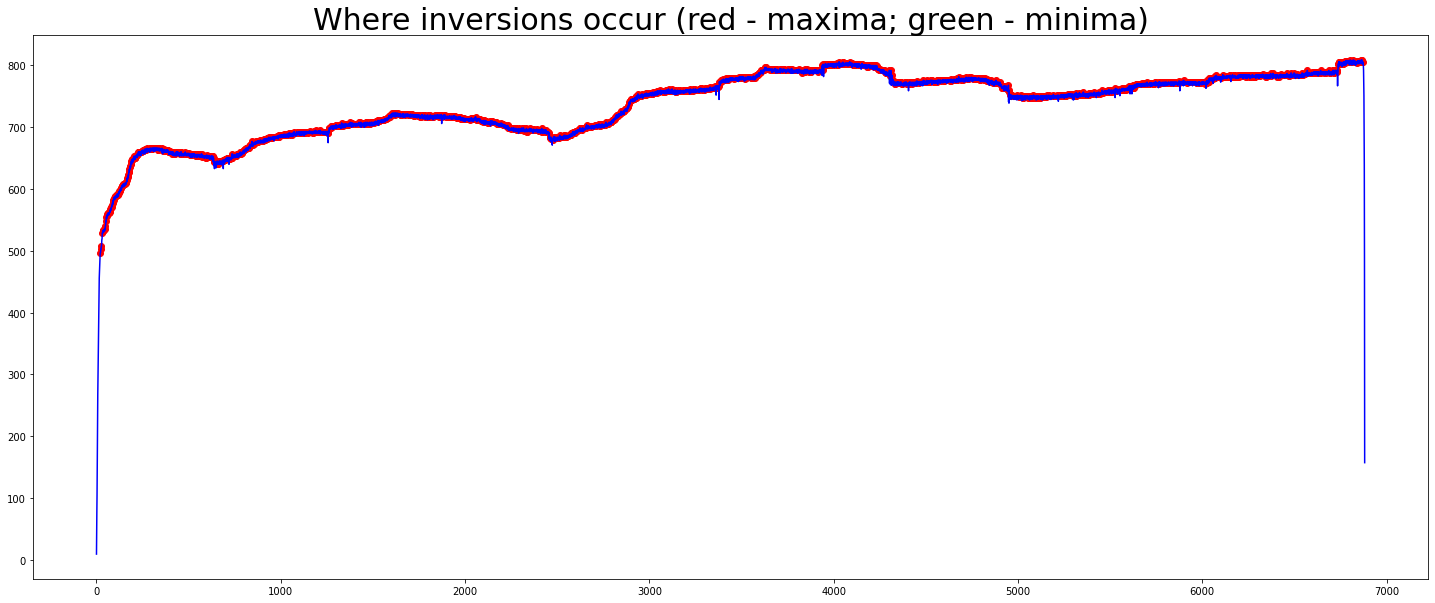

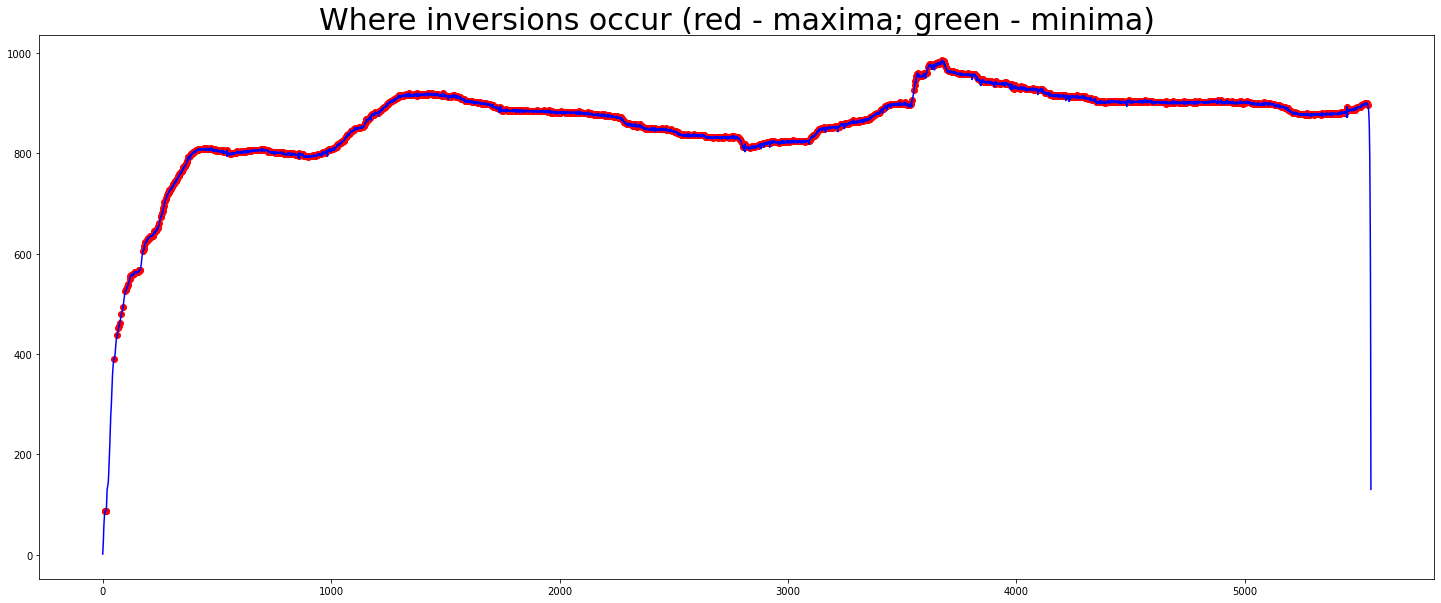

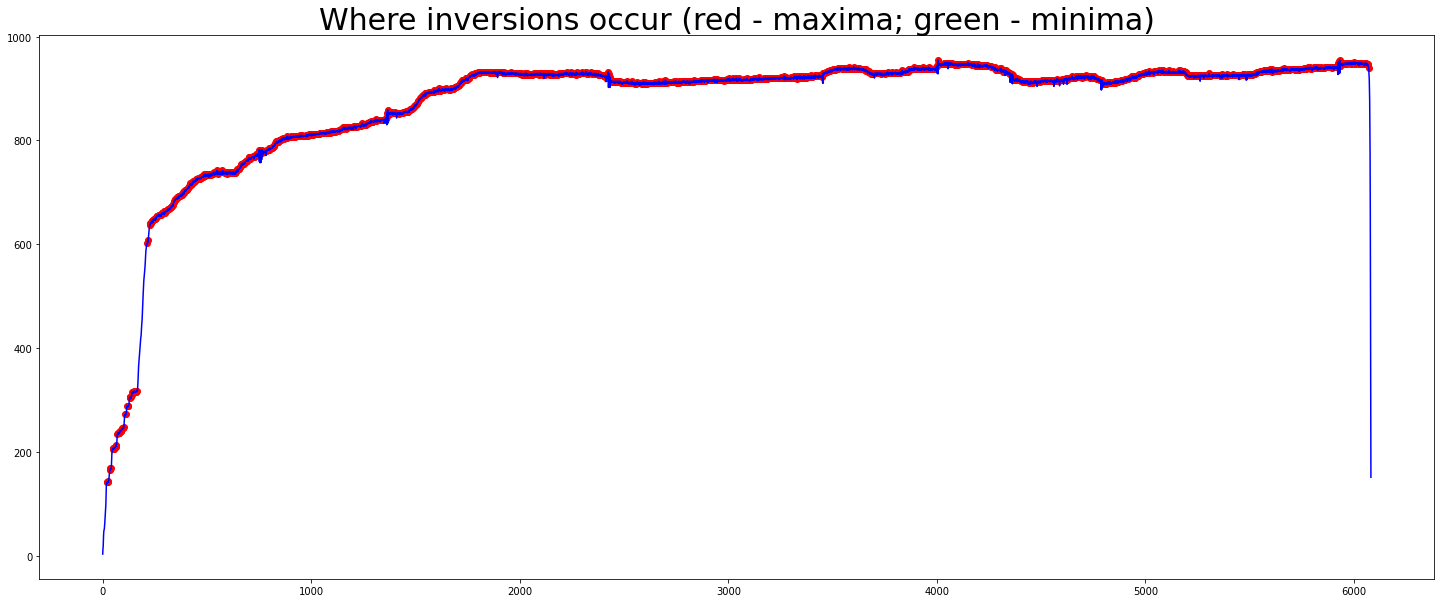

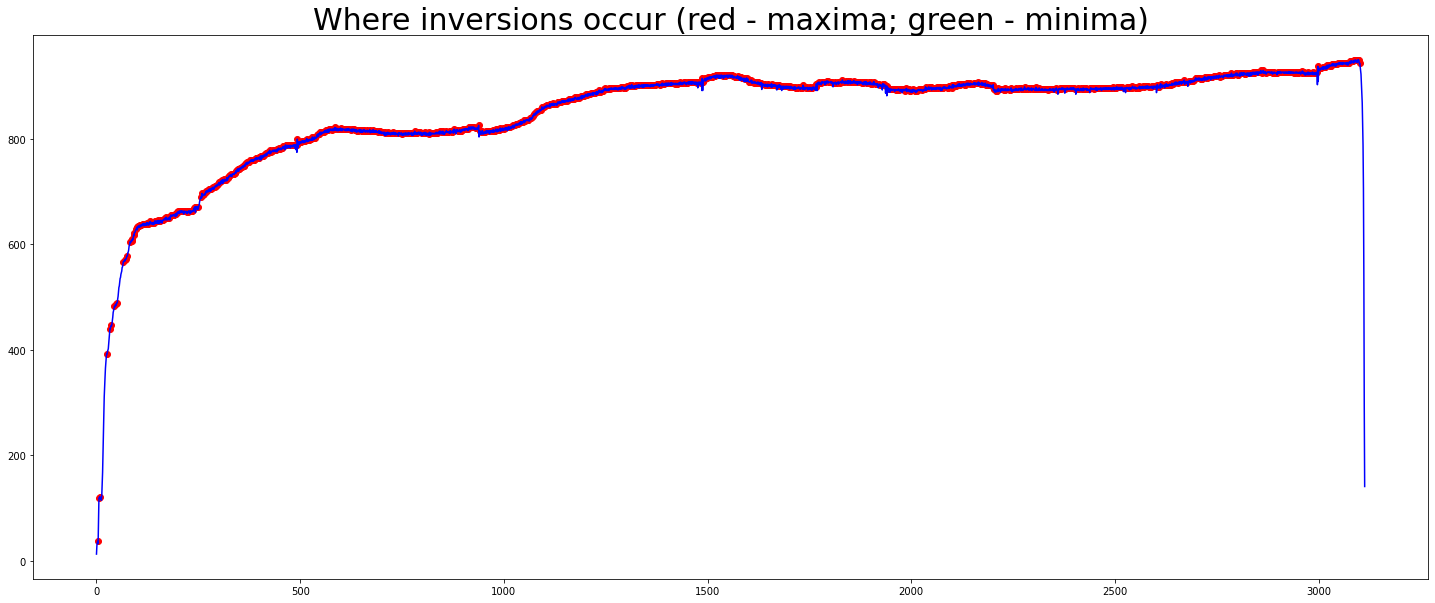

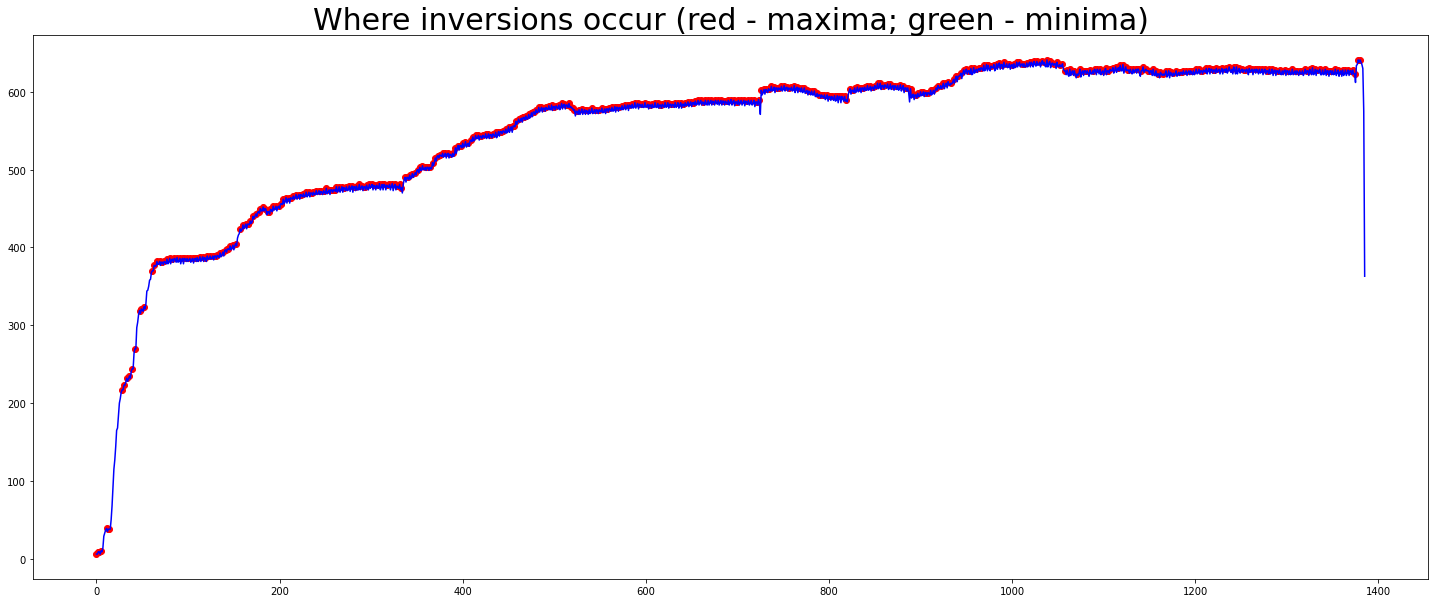

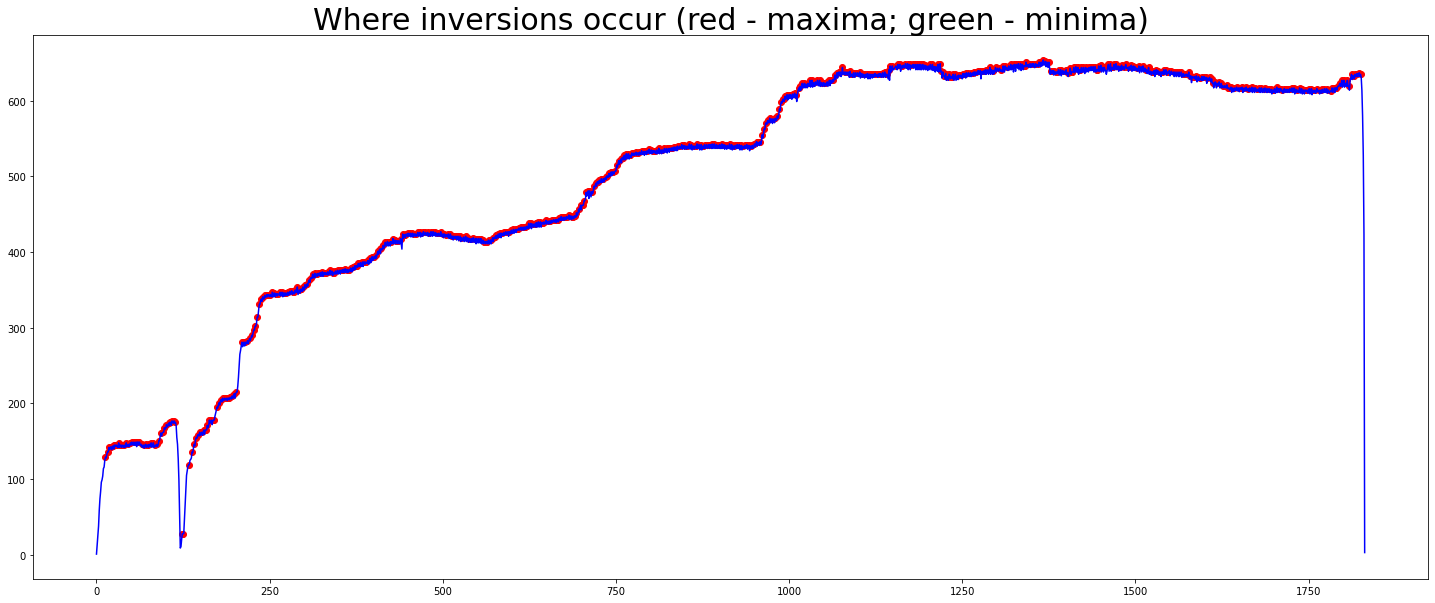

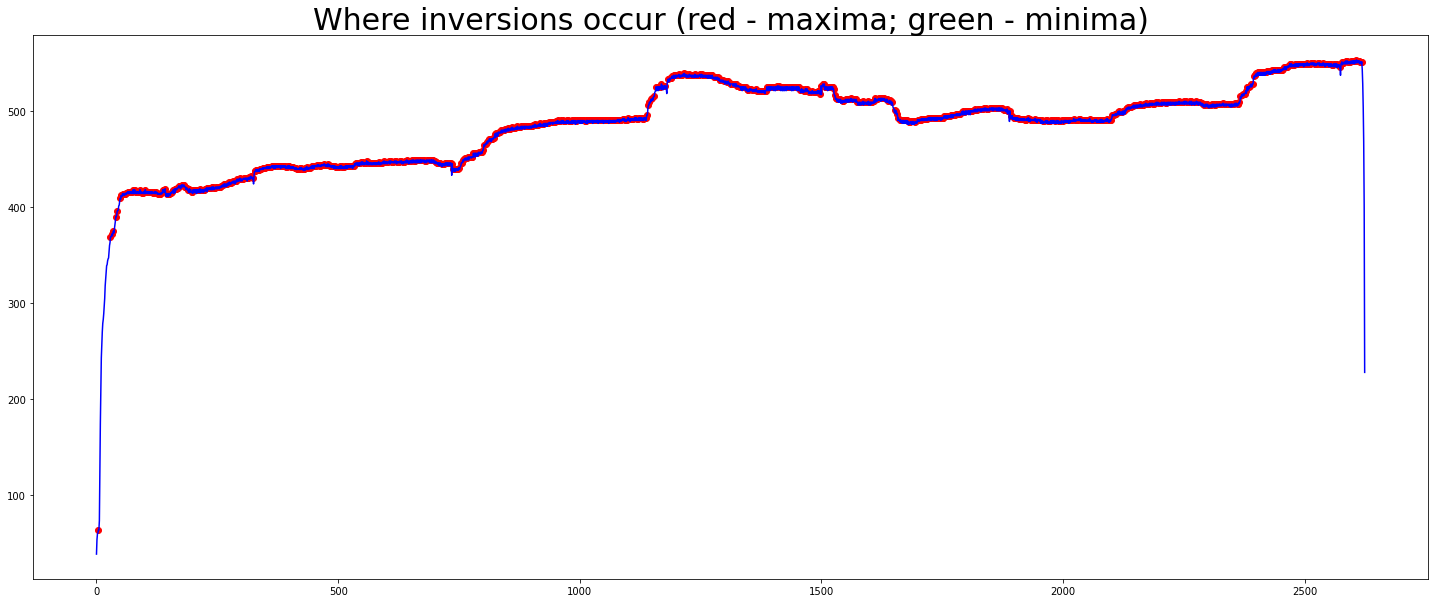

In [ ]:
extrema_length = []
extrema_rate = []
category = []
for filename in controlFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    static_df, dynamic_df = staticDynamicSplit(df)
    static_pressure = static_df[3]
    dynamic_pressure = dynamic_df[3]
    static_time = static_df[5]

    static_maxima = argrelextrema(np.array(static_pressure), np.greater_equal)
    extrema_length.append(len(static_maxima[0]))
    extrema_rate.append(len(static_maxima[0])/(max(static_time) - min(static_time)))
    category.append("Control")
    plt.figure(figsize = (25, 10))
    plt.plot(static_pressure, 'b')
    for i in static_maxima: 
        plt.scatter(i, static_pressure[i], marker = 'o', c = 'r')
    plt.title('Where inversions occur (red - maxima; green - minima)', fontsize = 30)
    print(len(static_maxima[0]))

1178
900
1168
1918
1126
870
982
713
1778
366
1639
989
1569
384
2791
326
2865
831
509
1557
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
374
1192
415
1241
691
628
853
1170
1055
680
759
2841
5713
3305
1016
1495
113
1036
1172
299
626
2638
2154
1003
593
1439
1272
937
717
2268
493
4259
2476
1892
1019
111
2143
481
2216
1350
546


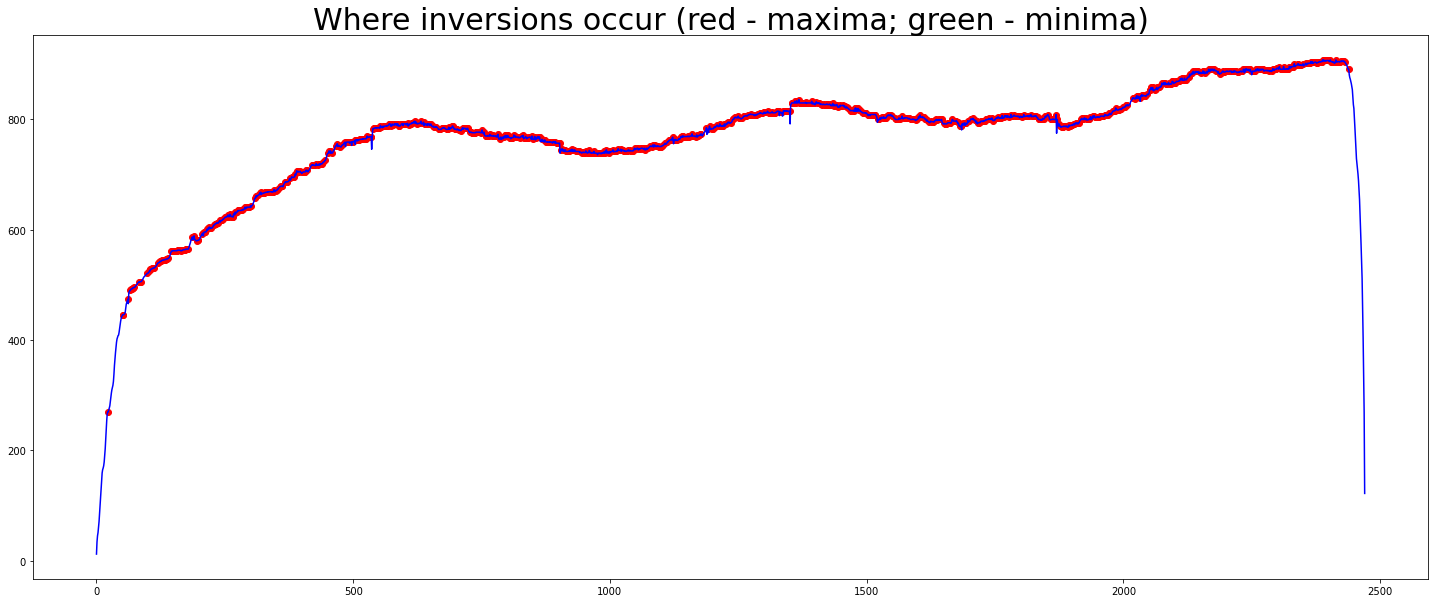

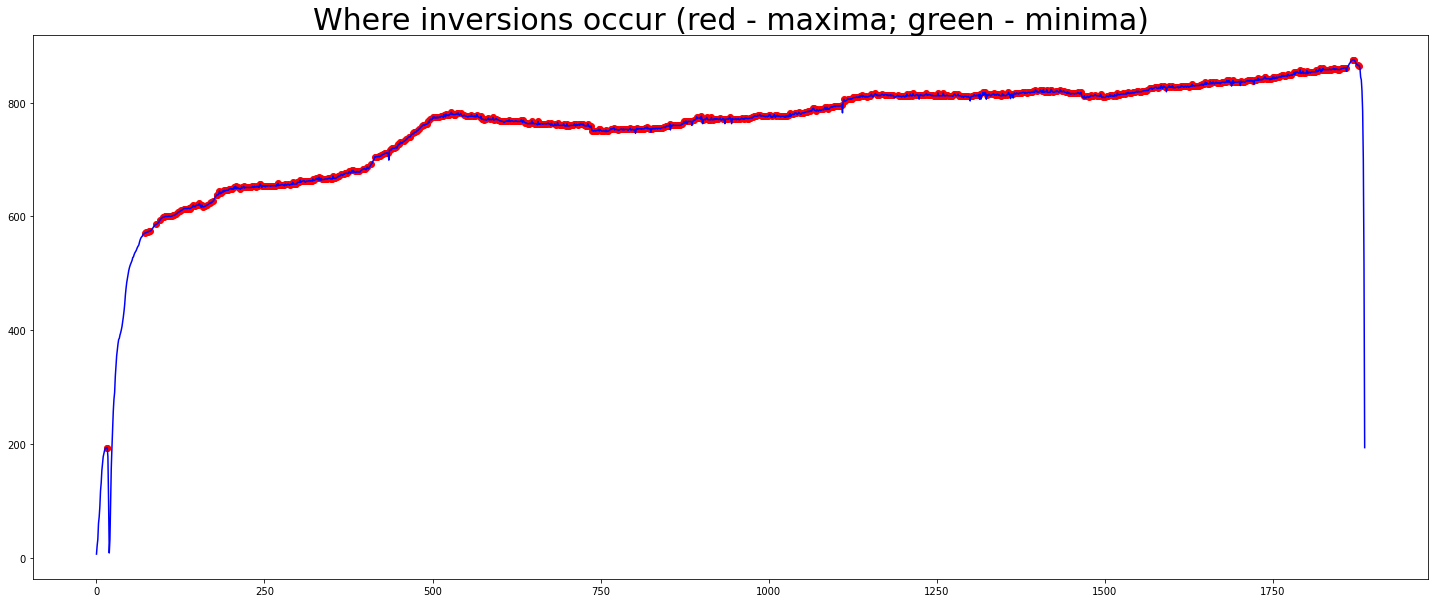

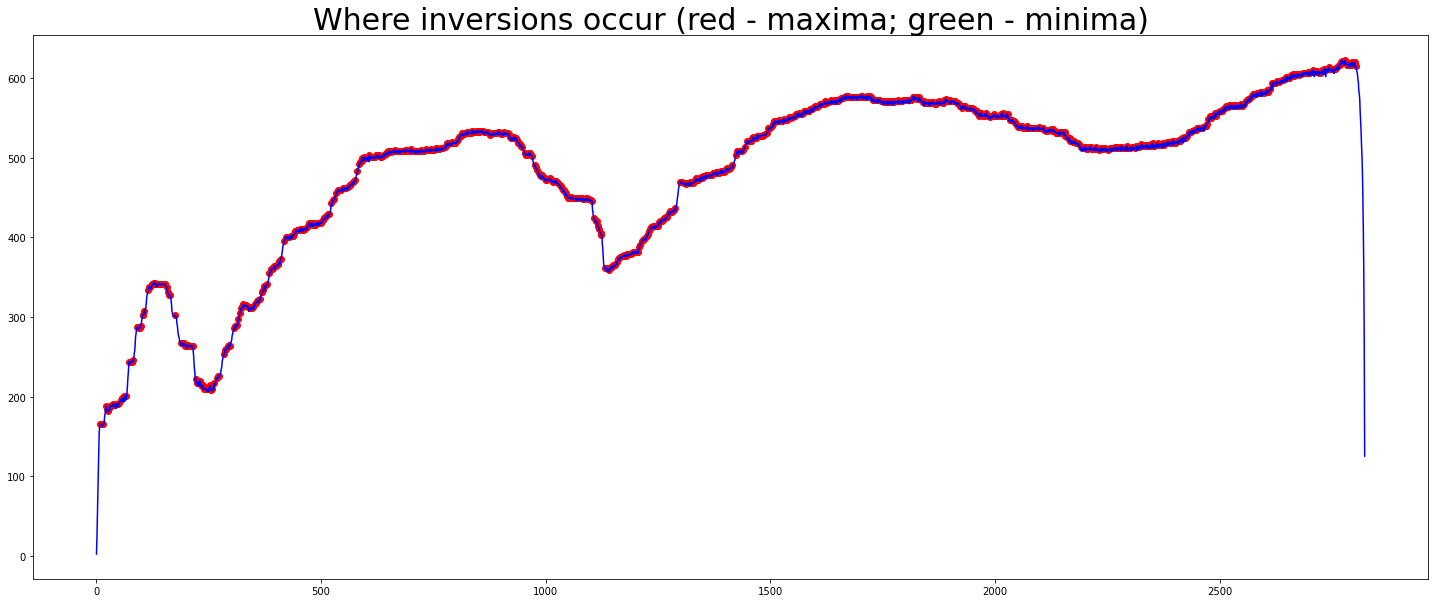

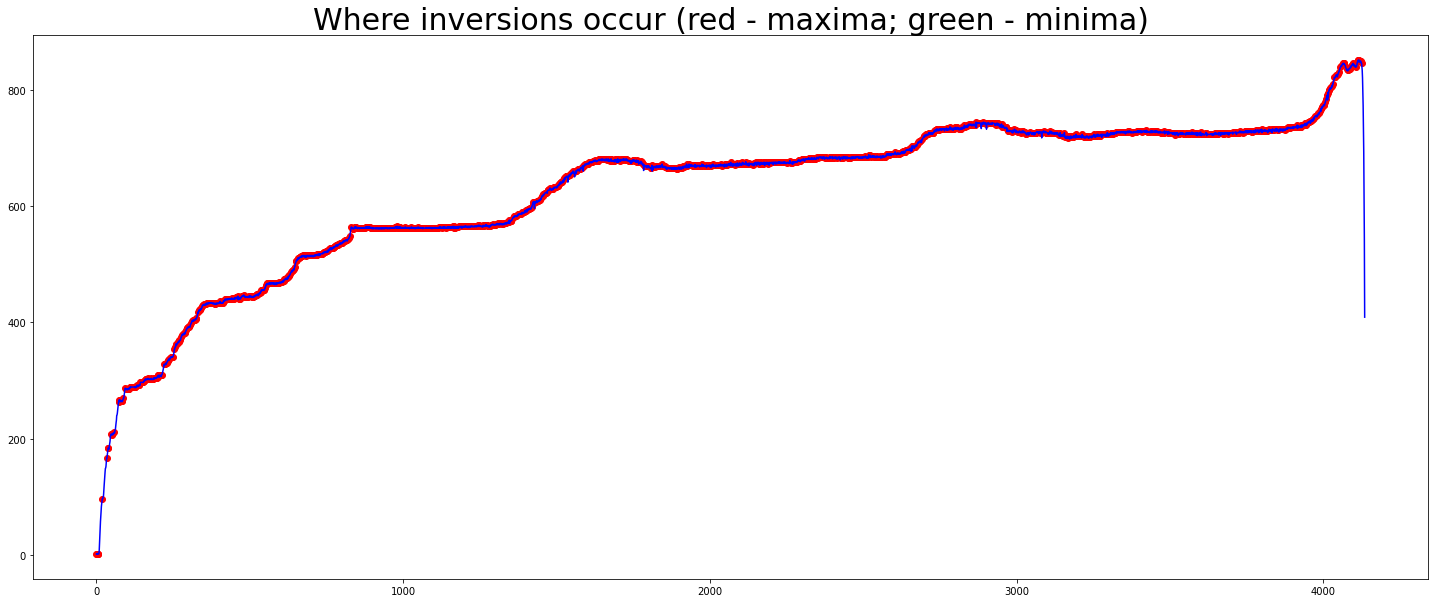

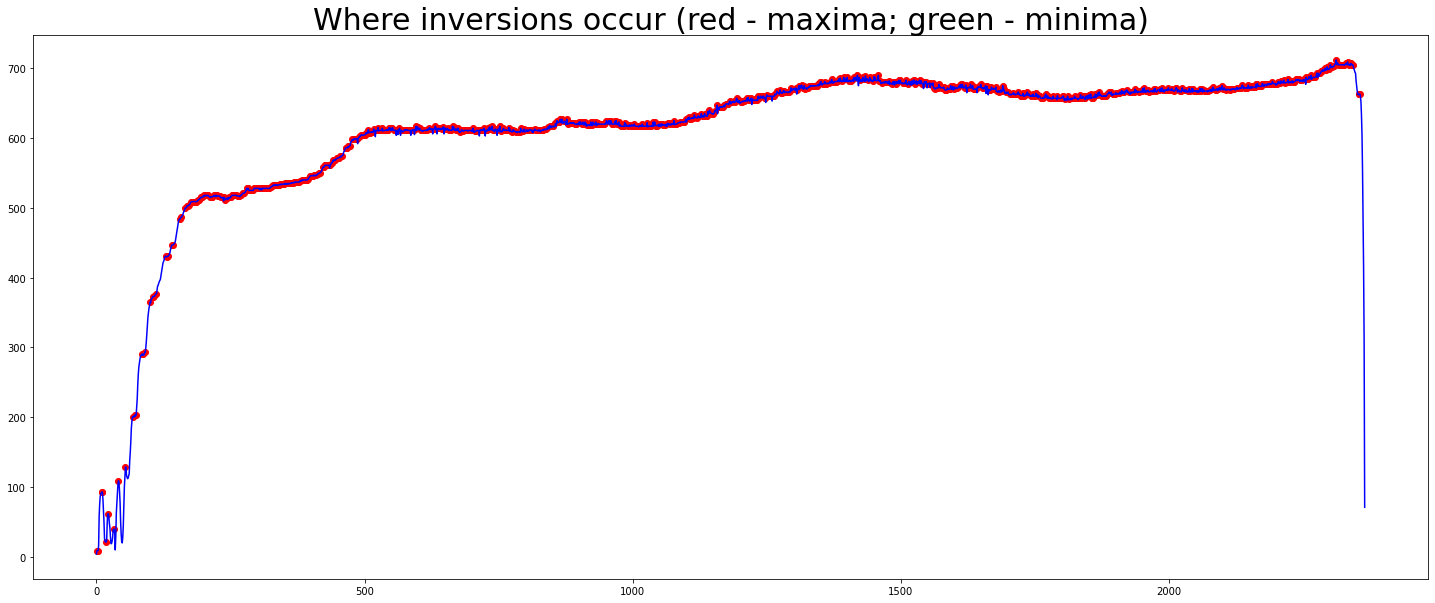

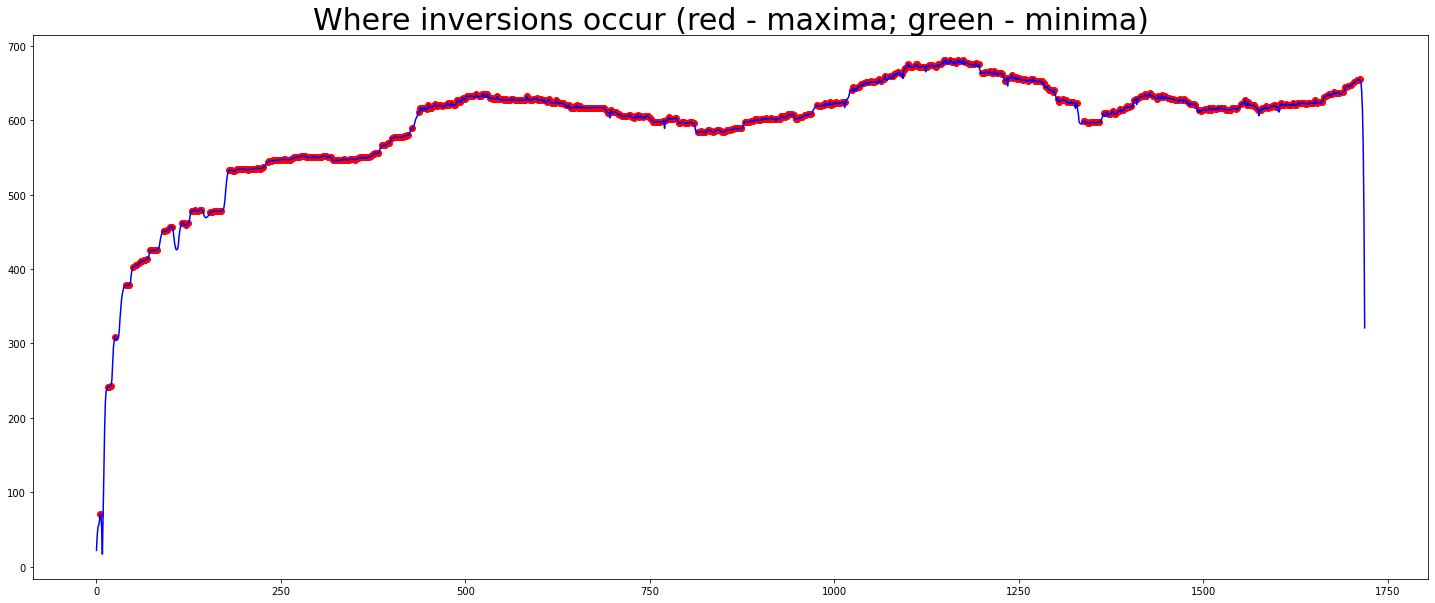

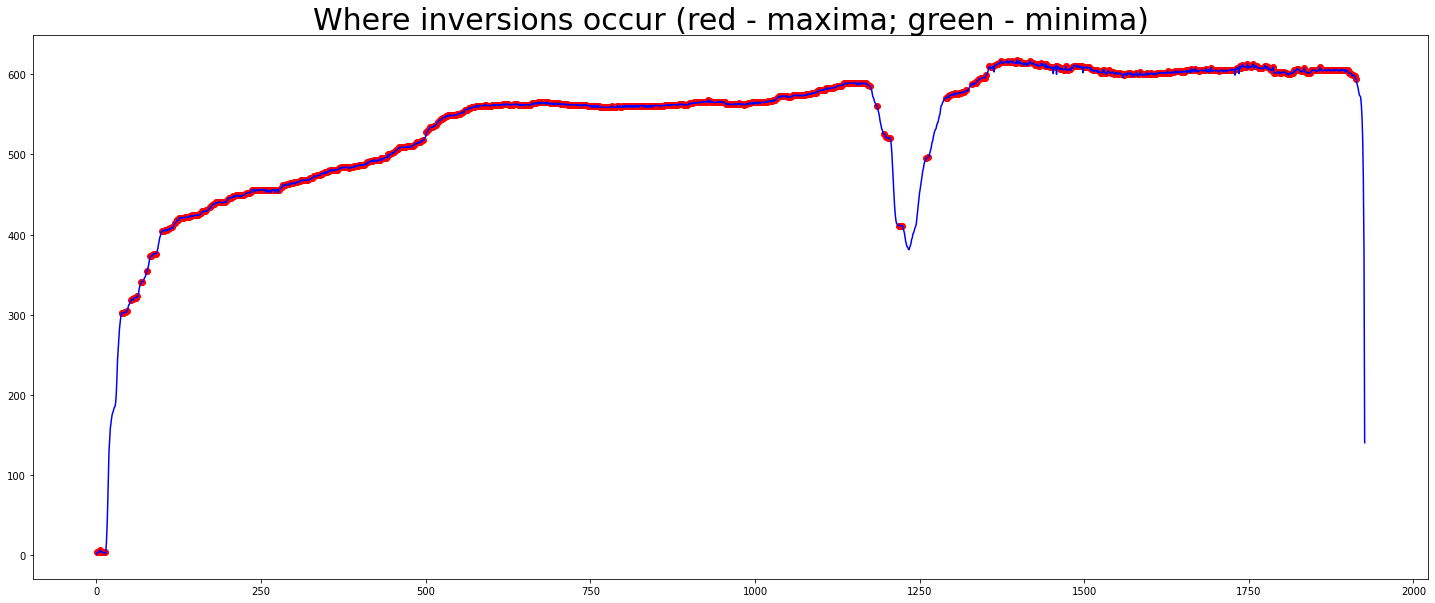

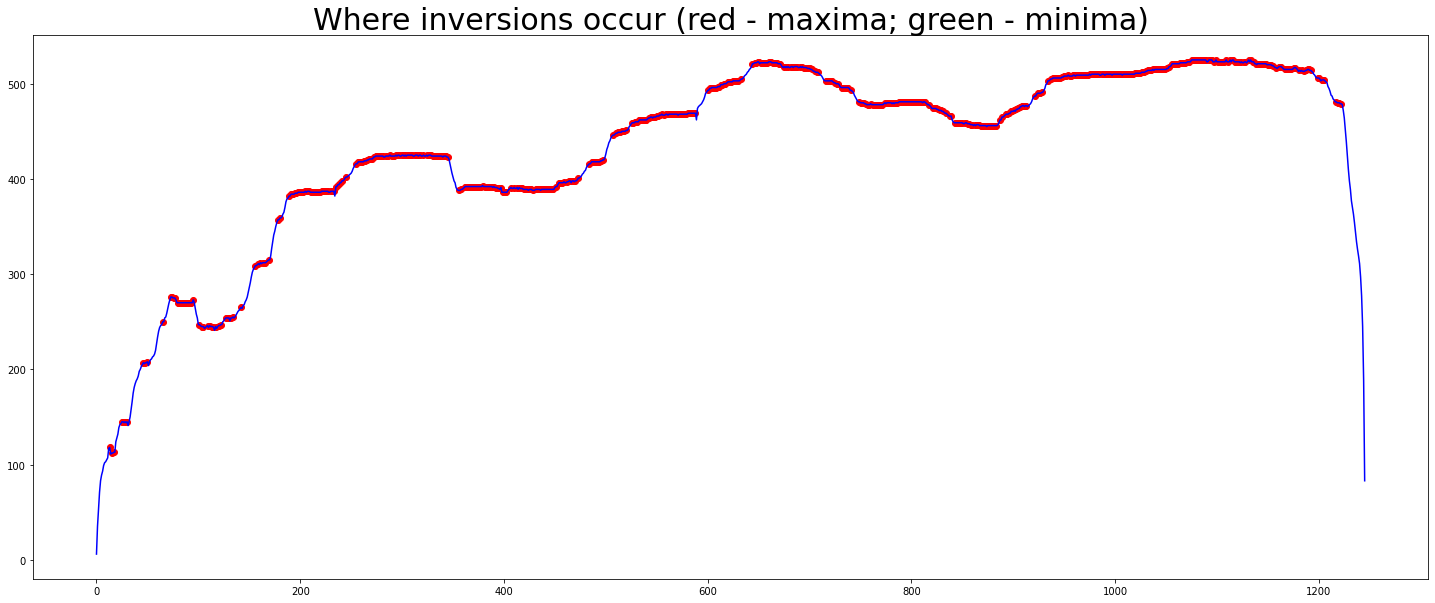

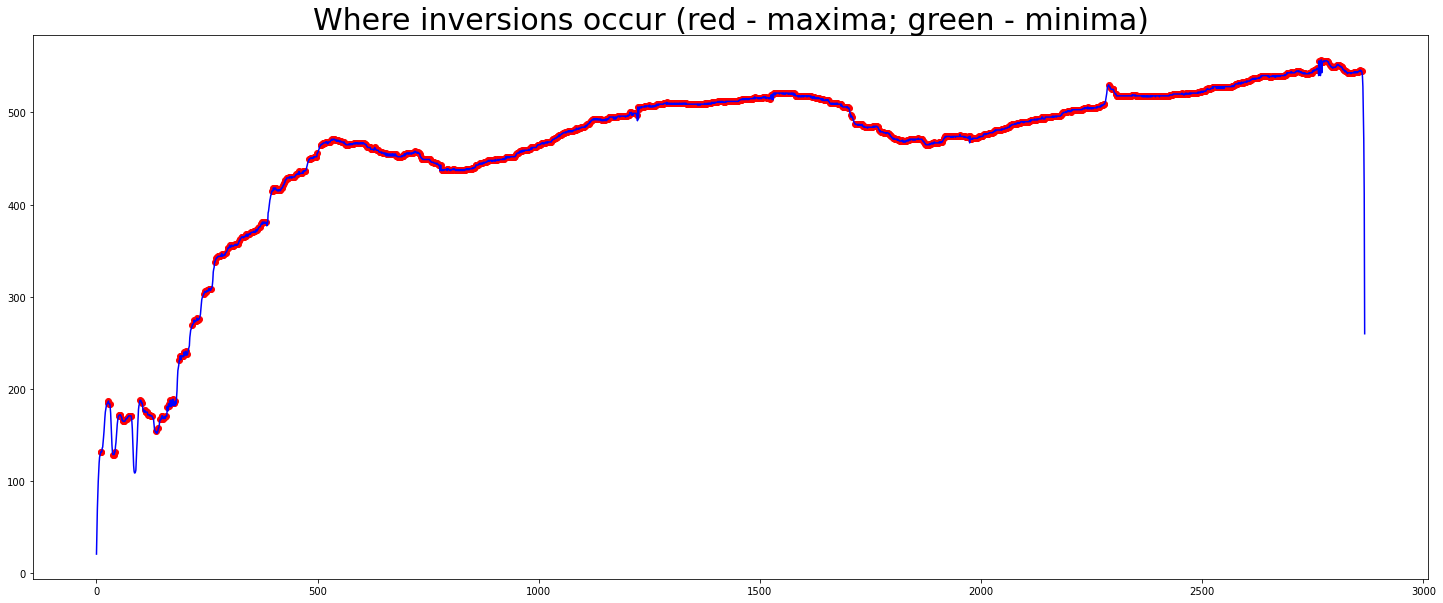

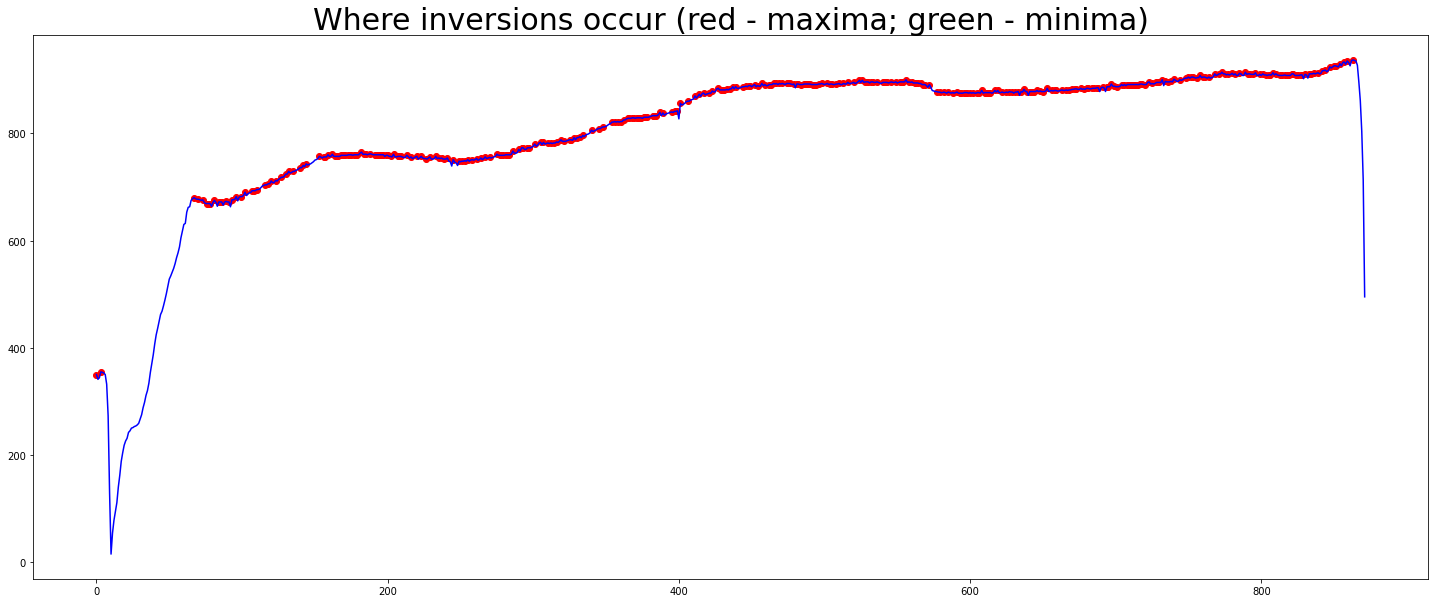

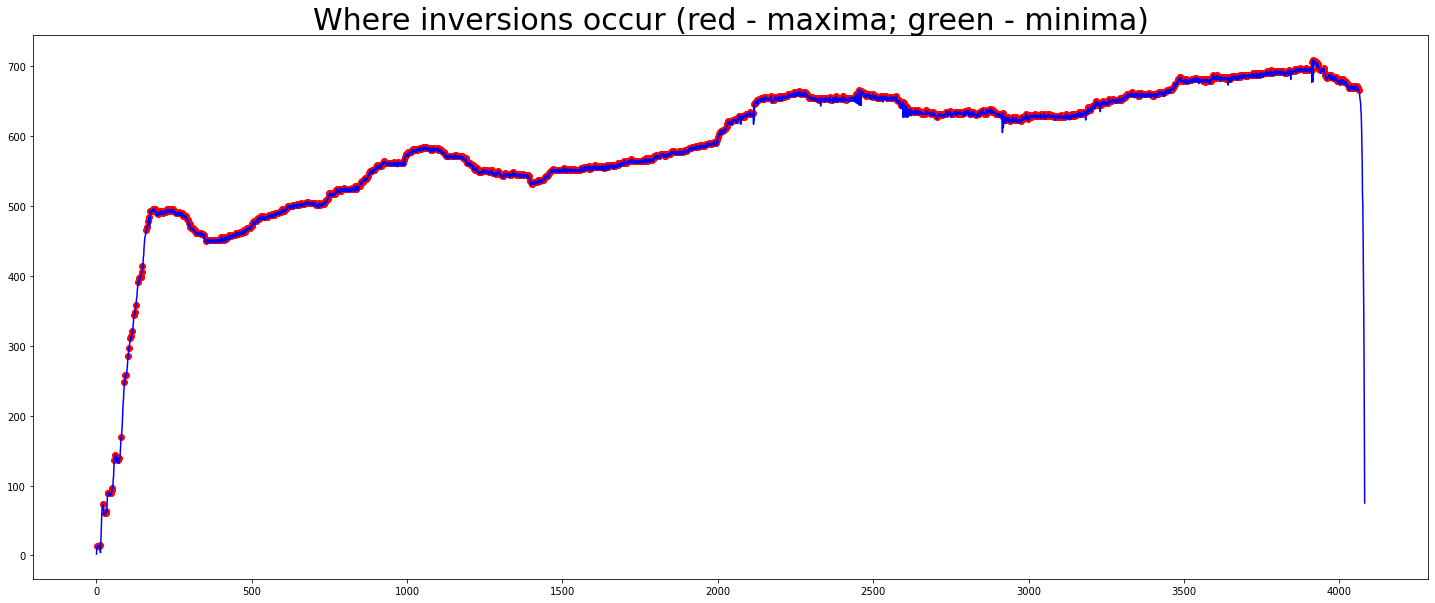

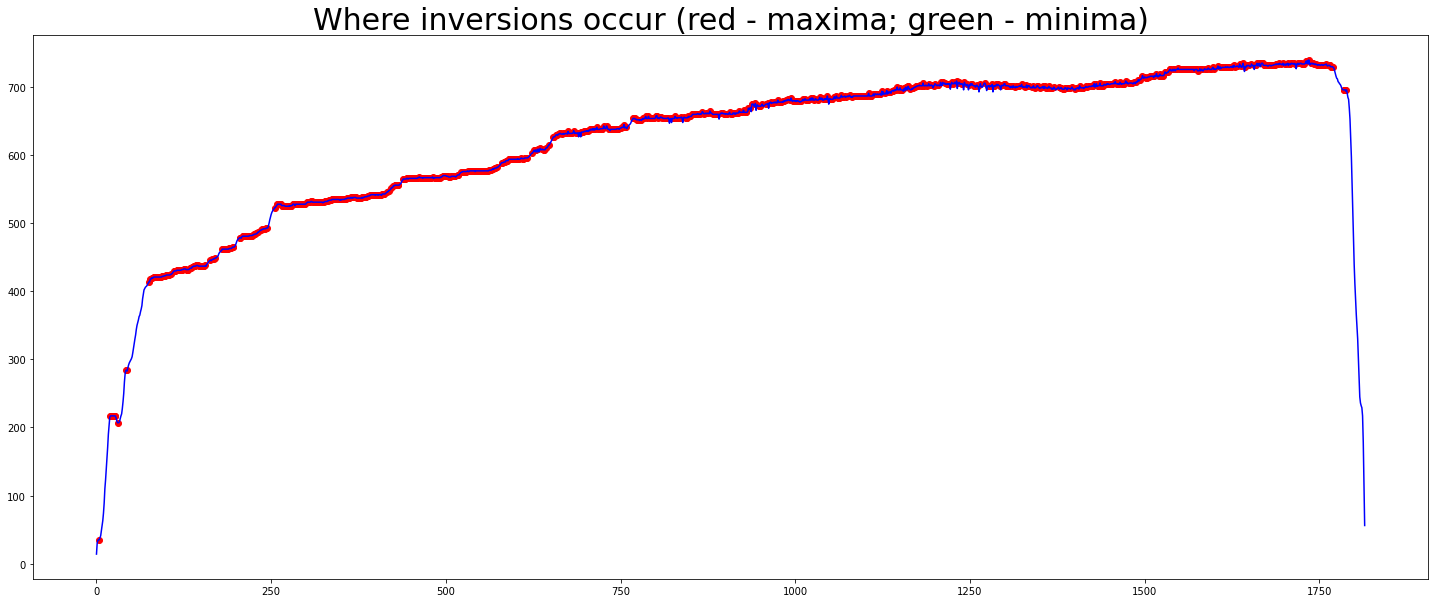

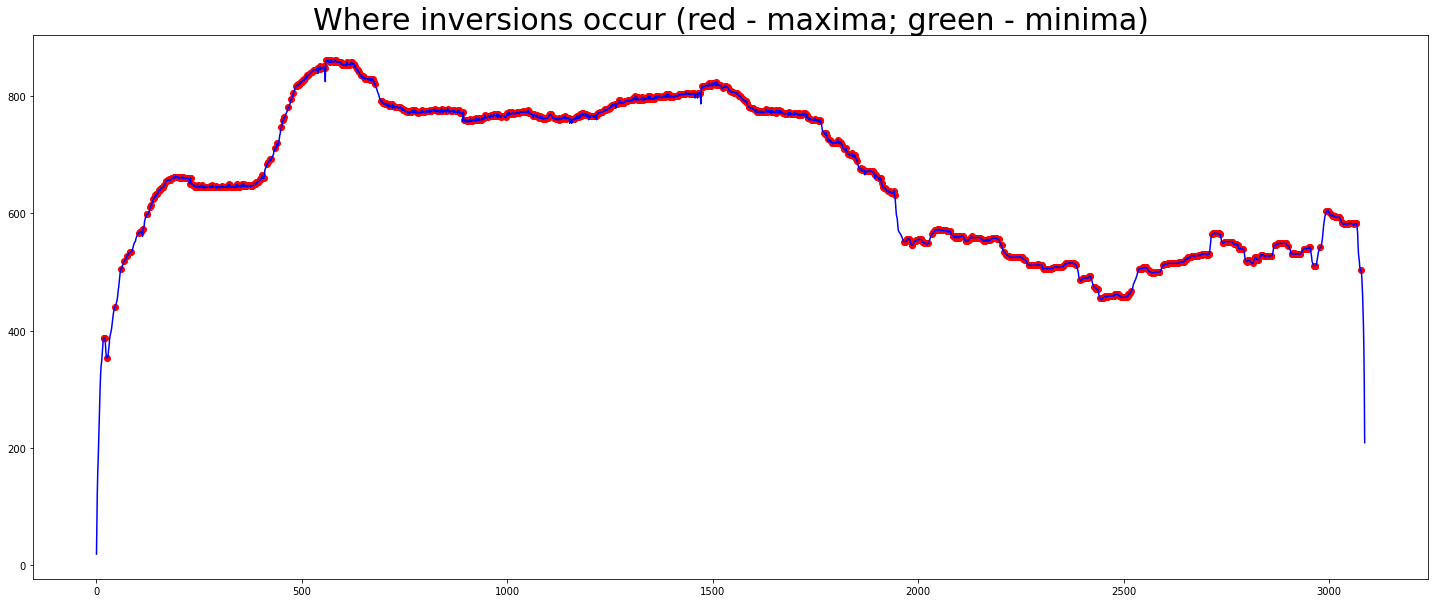

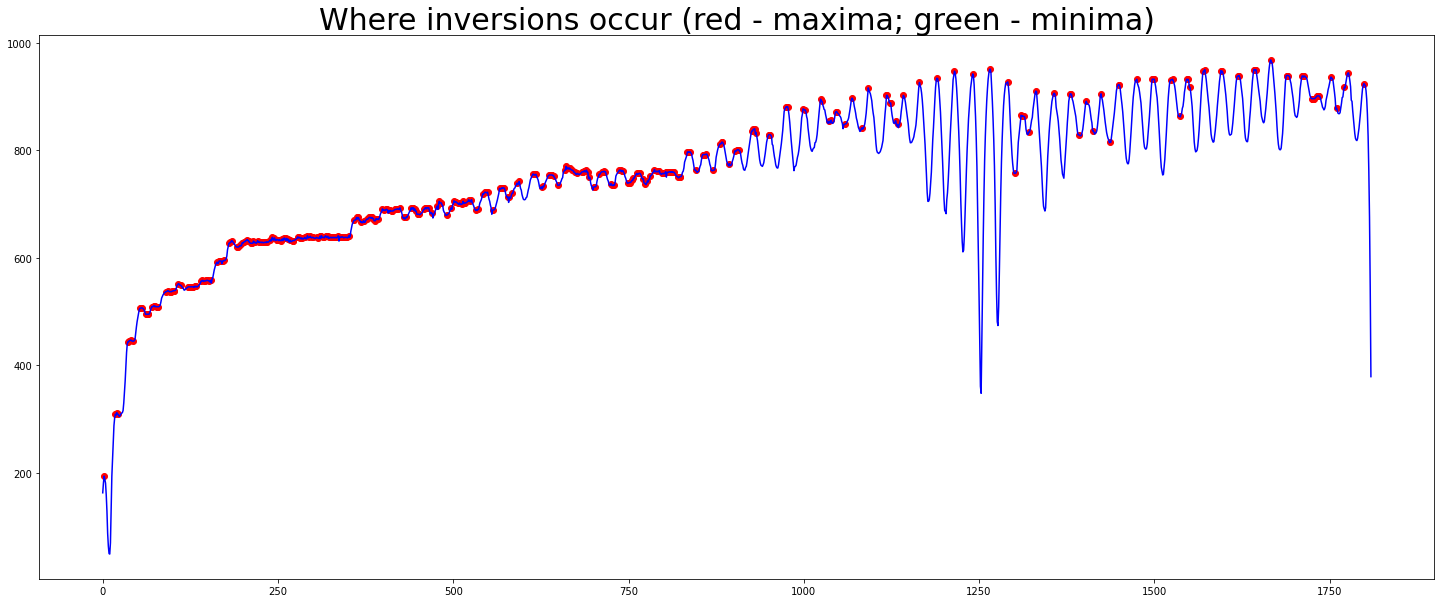

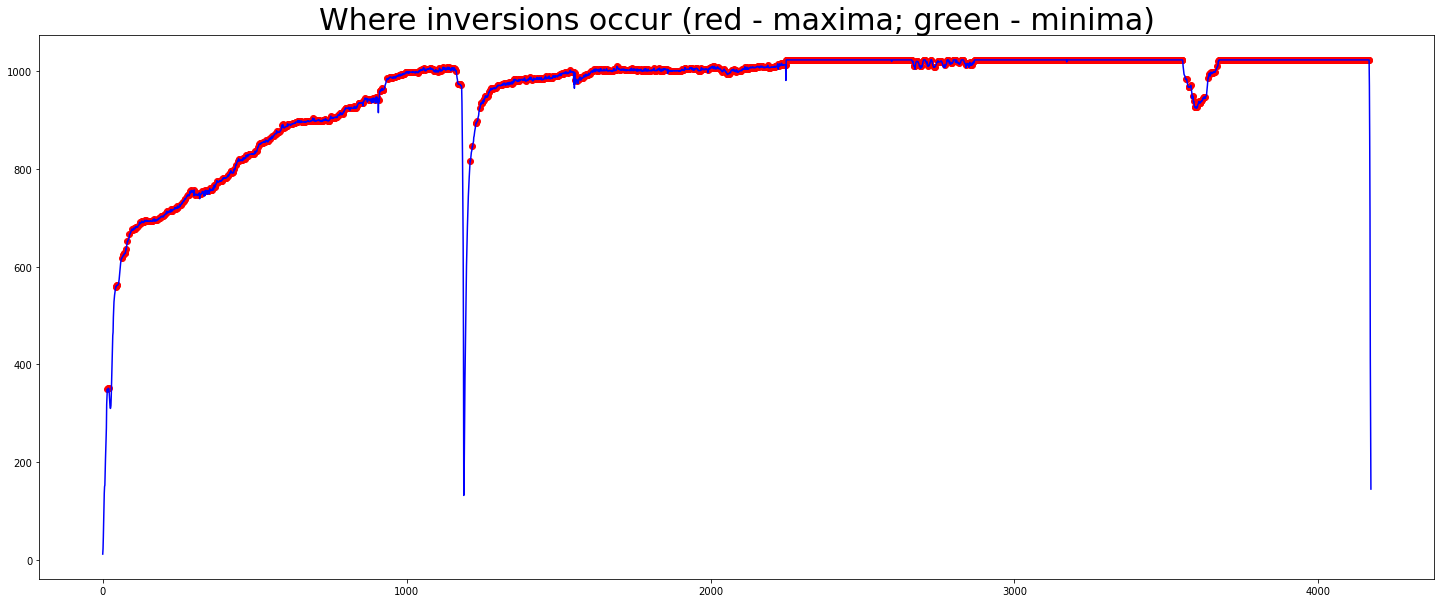

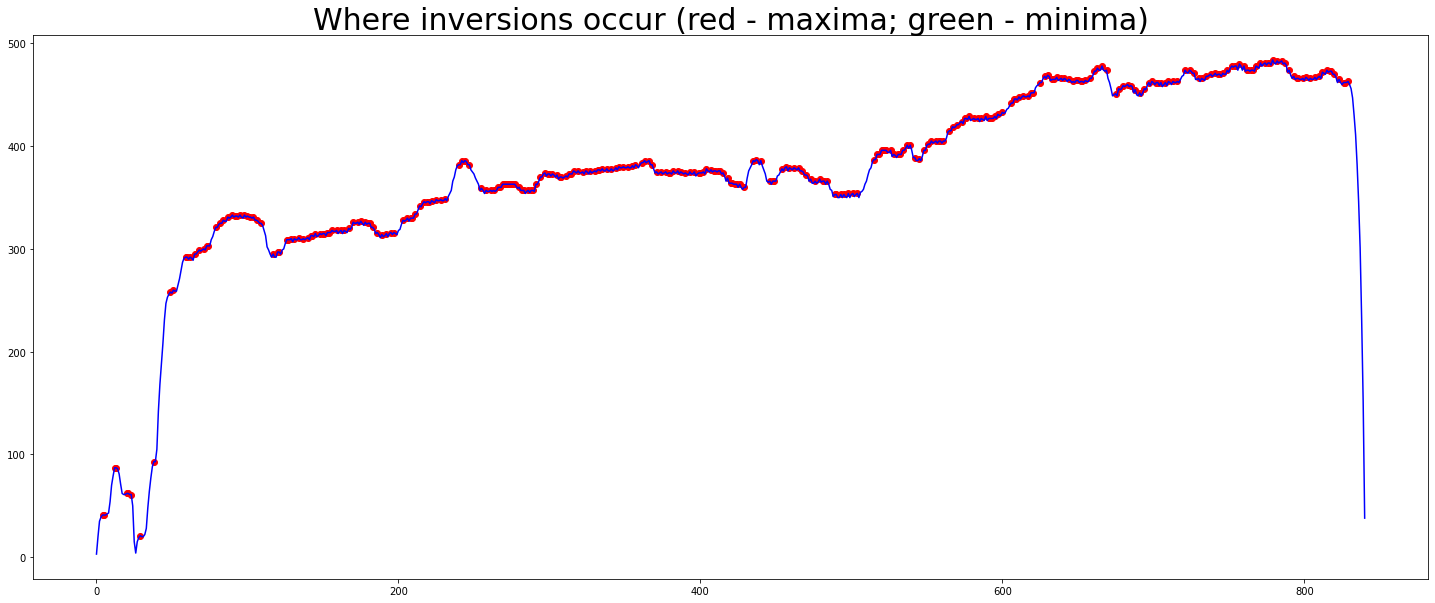

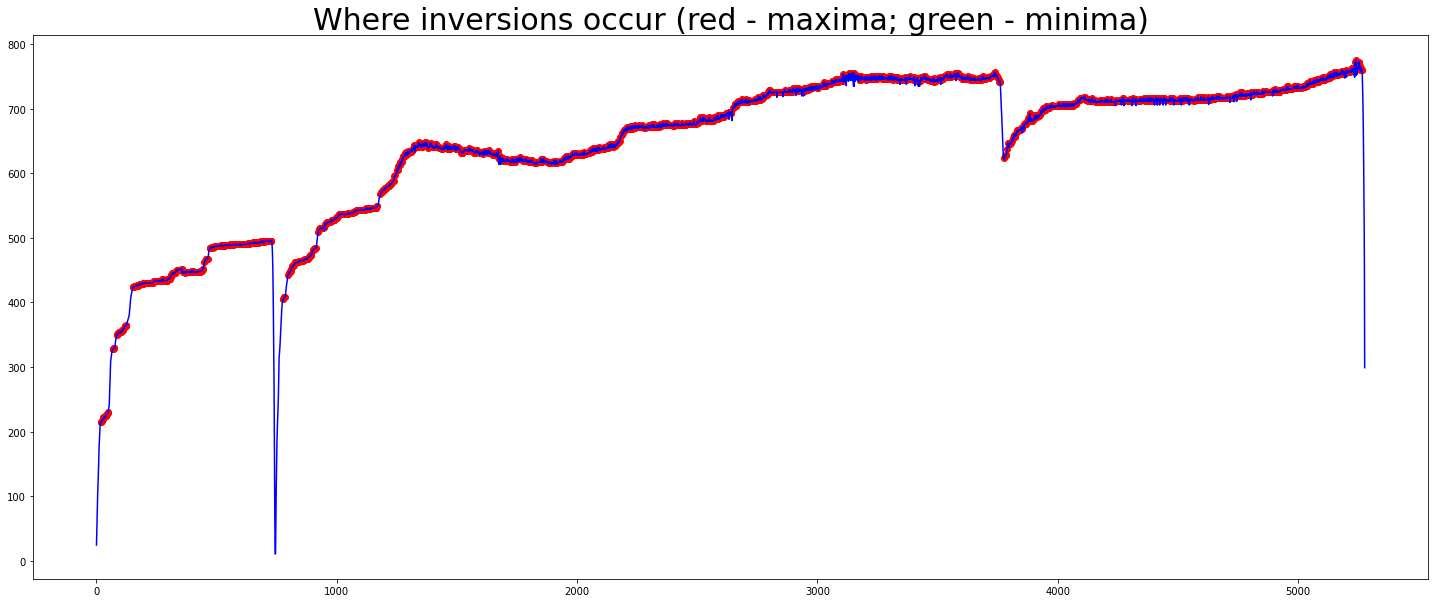

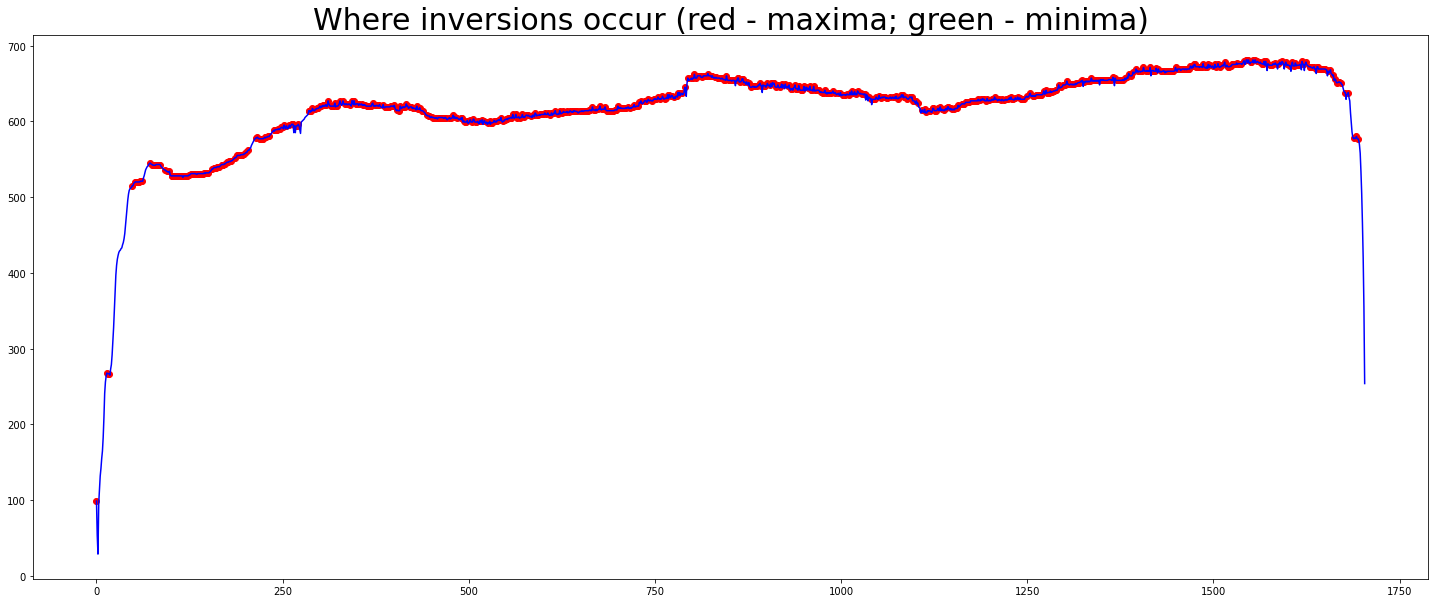

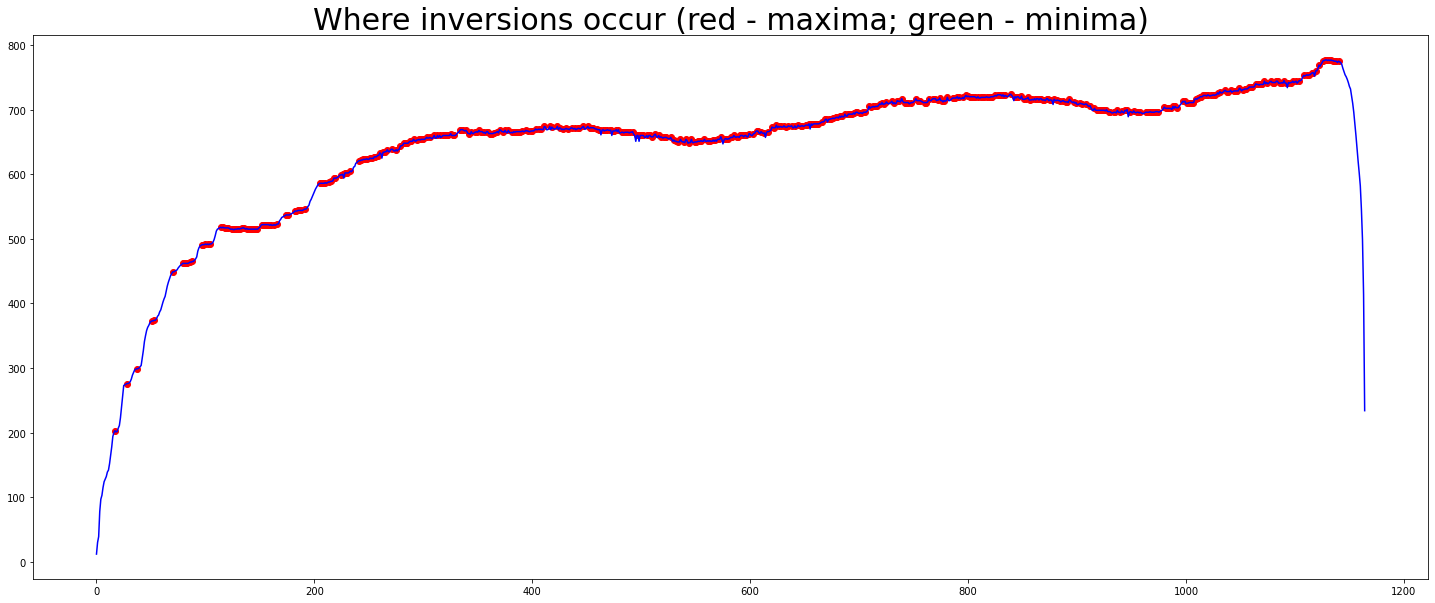

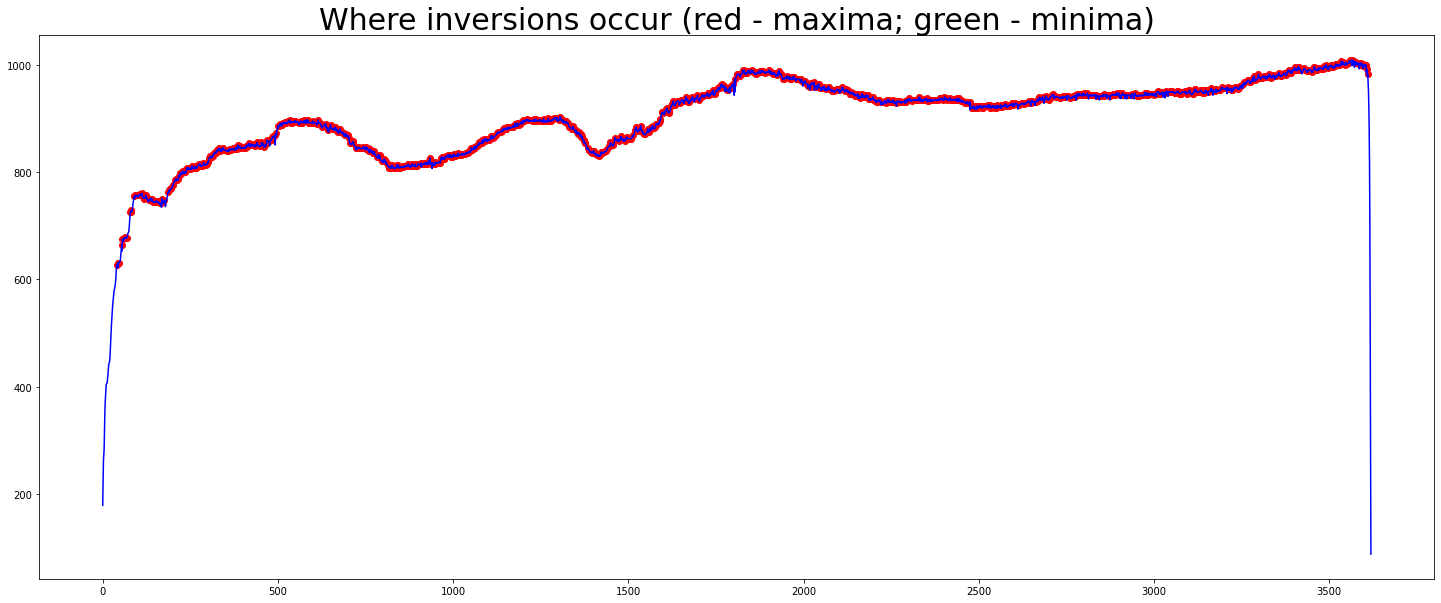

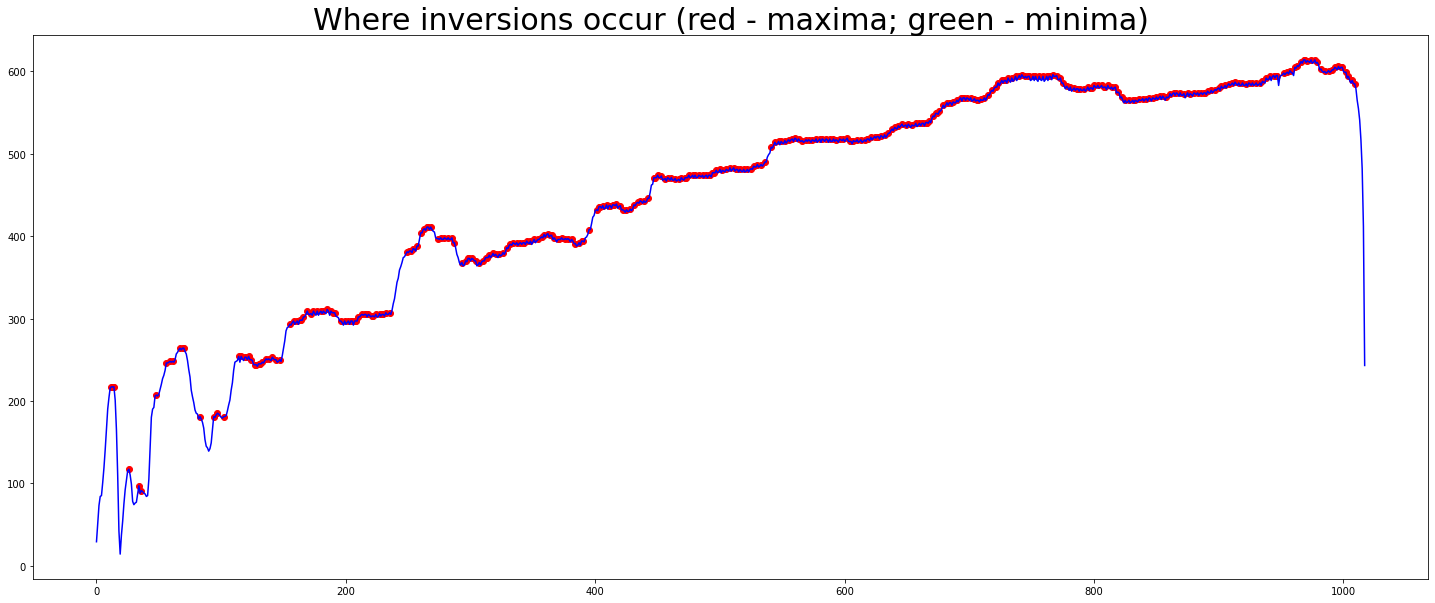

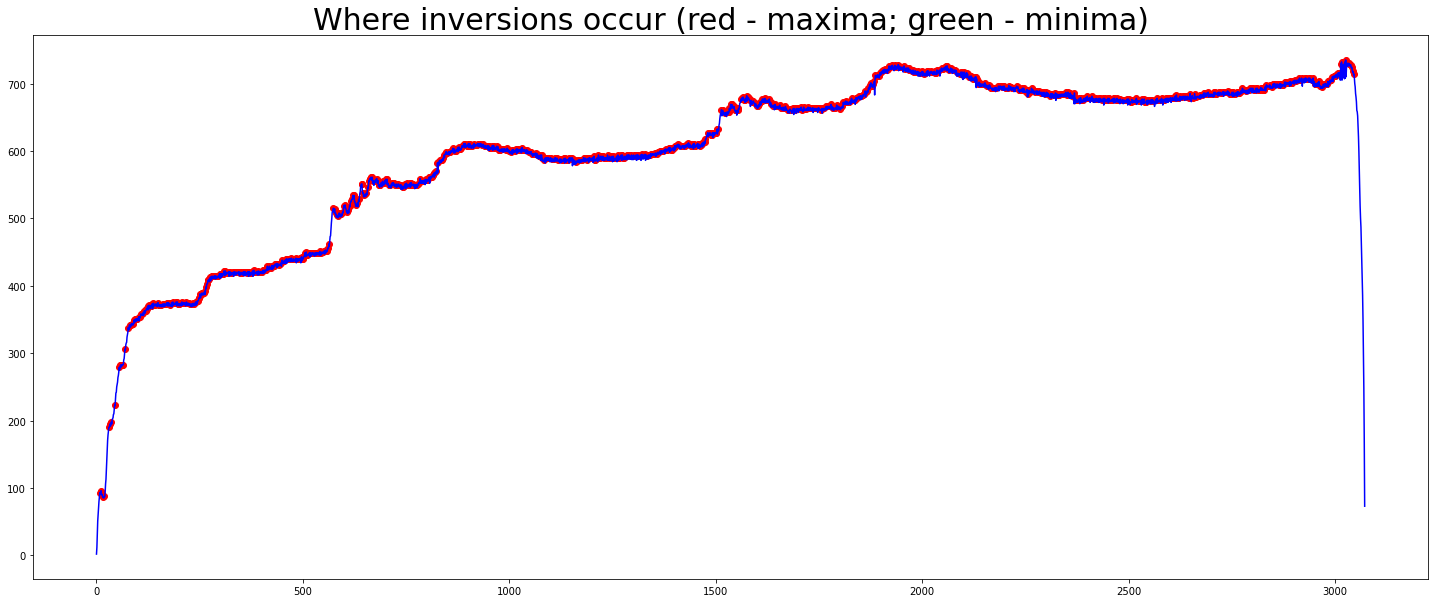

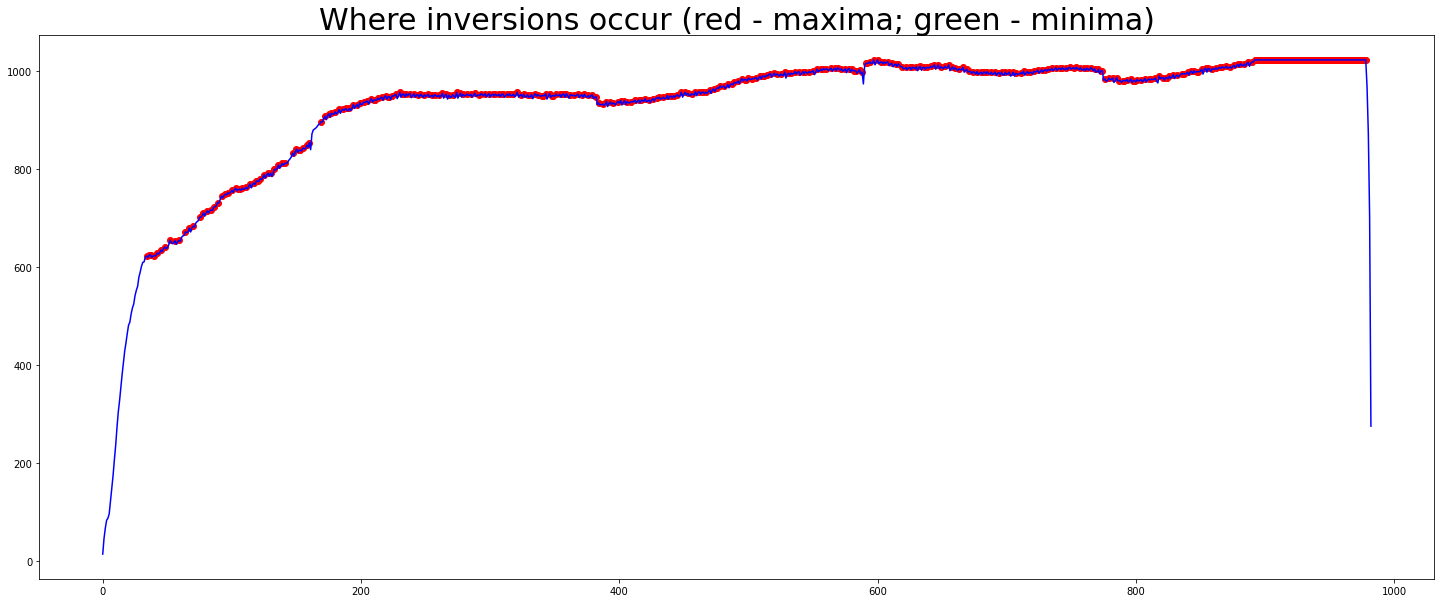

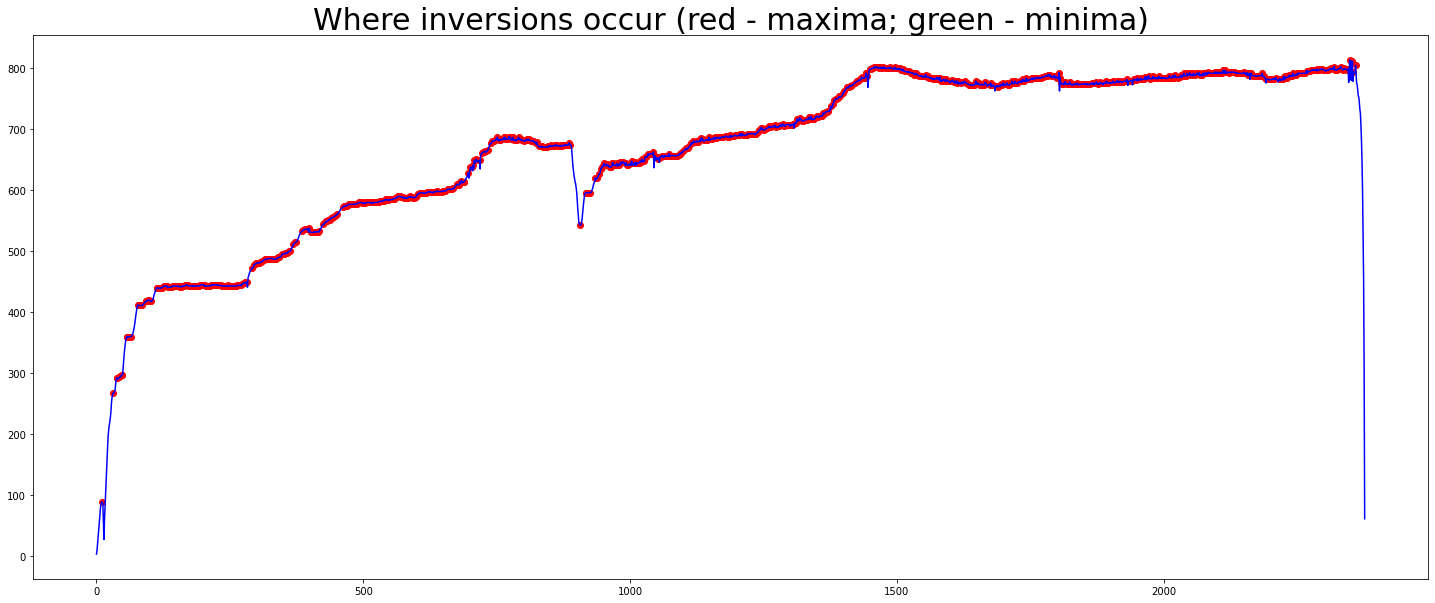

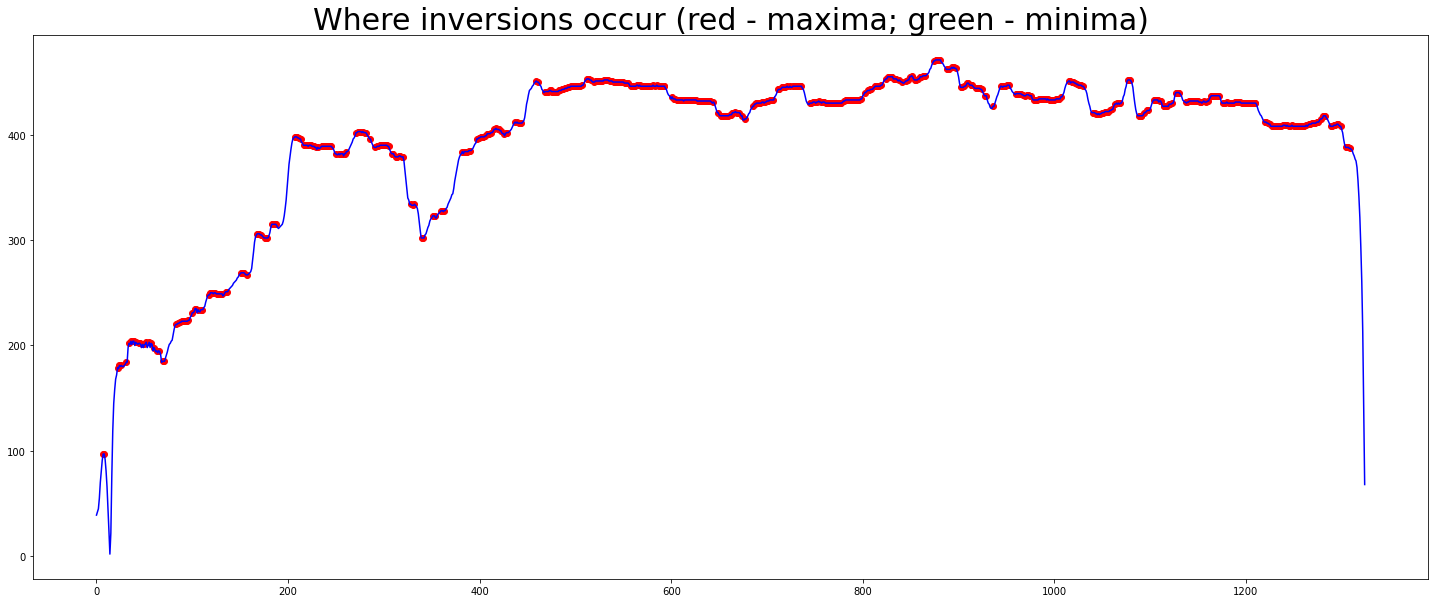

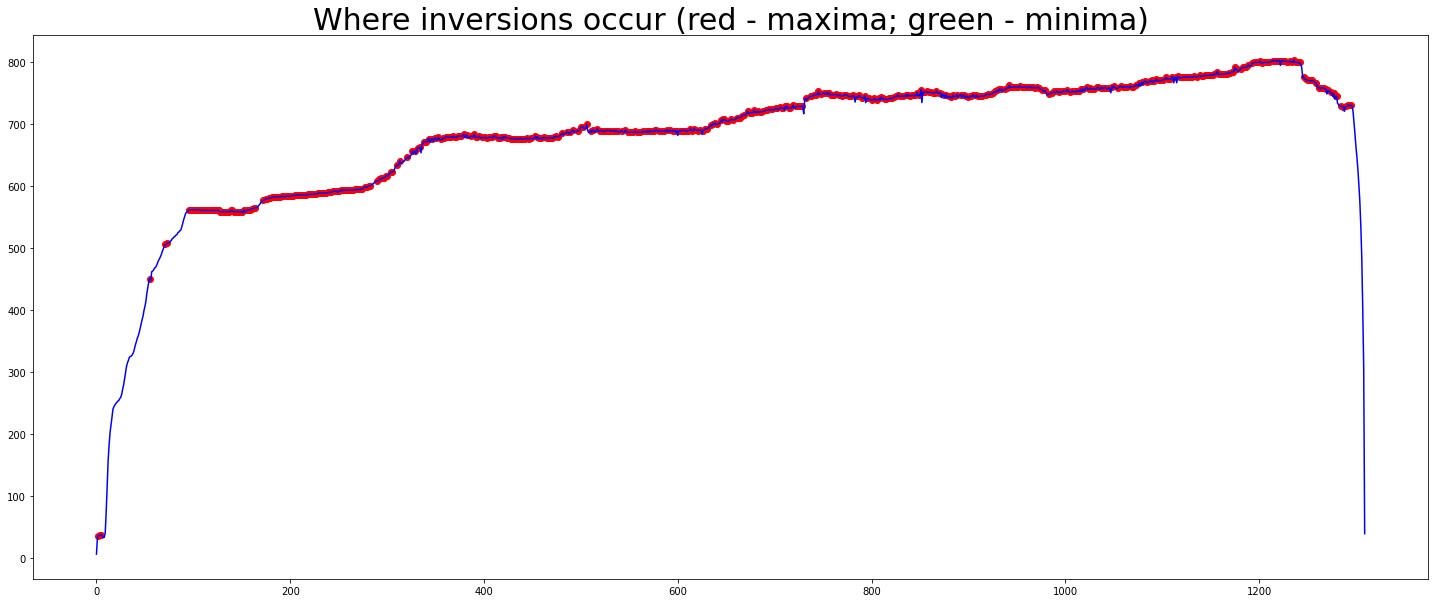

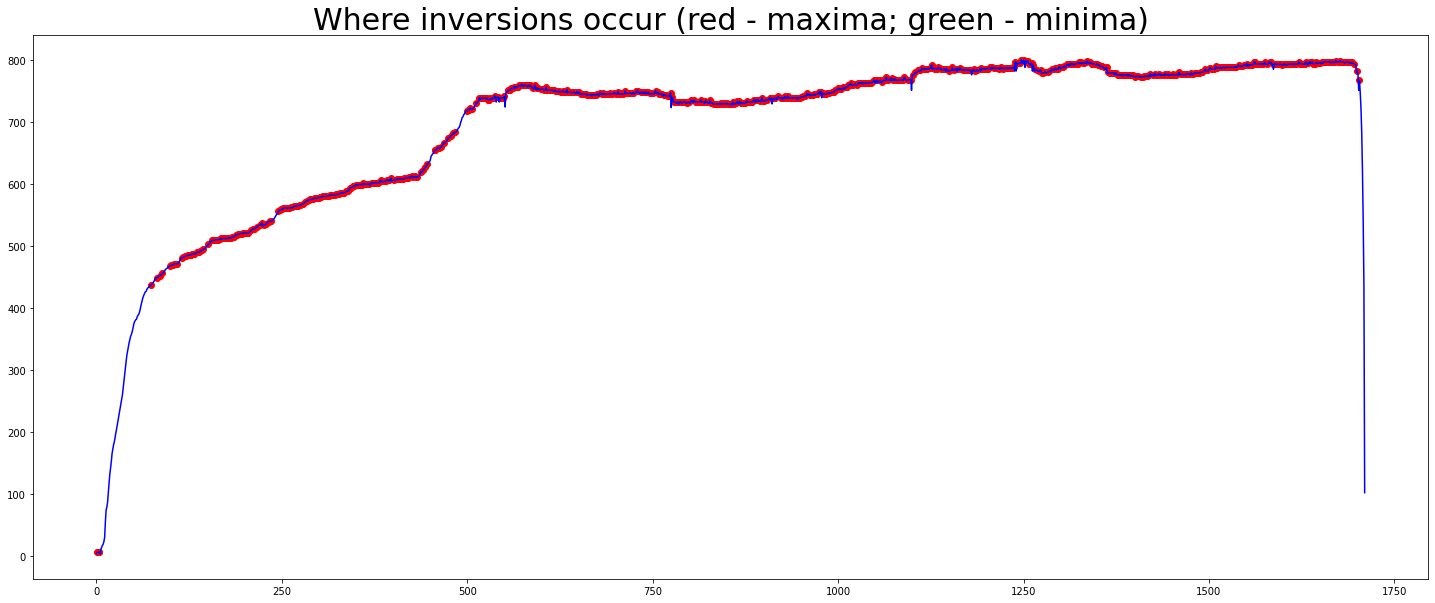

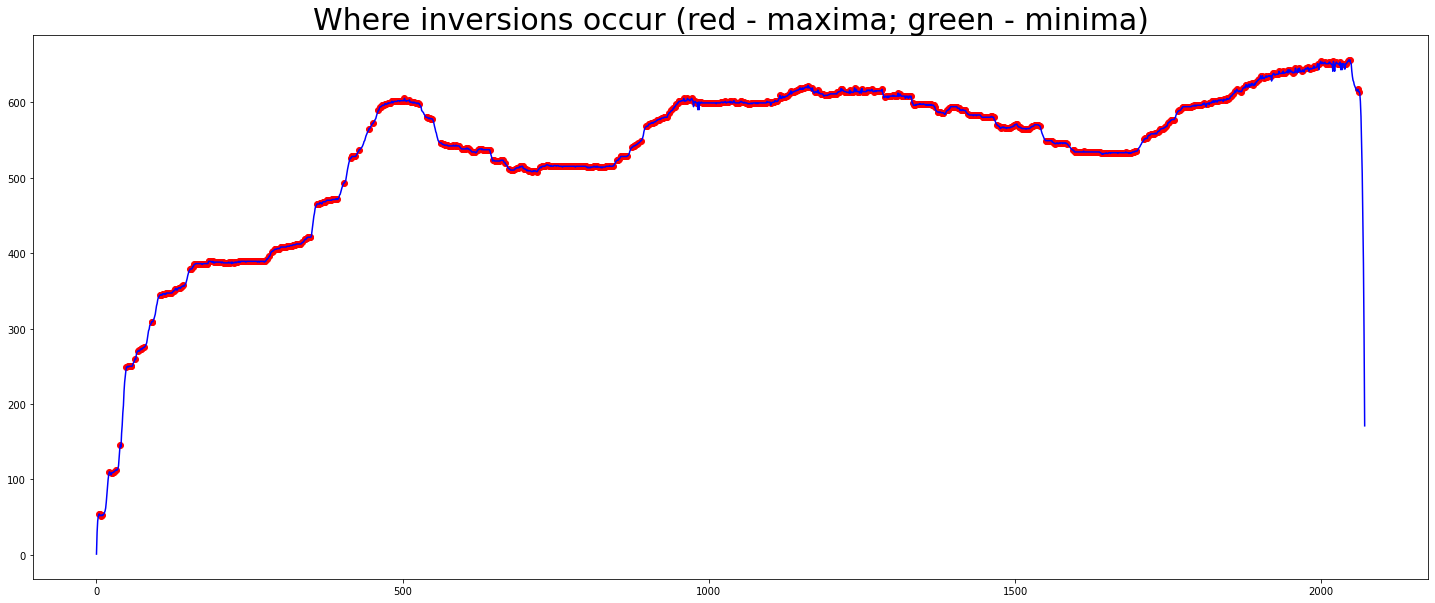

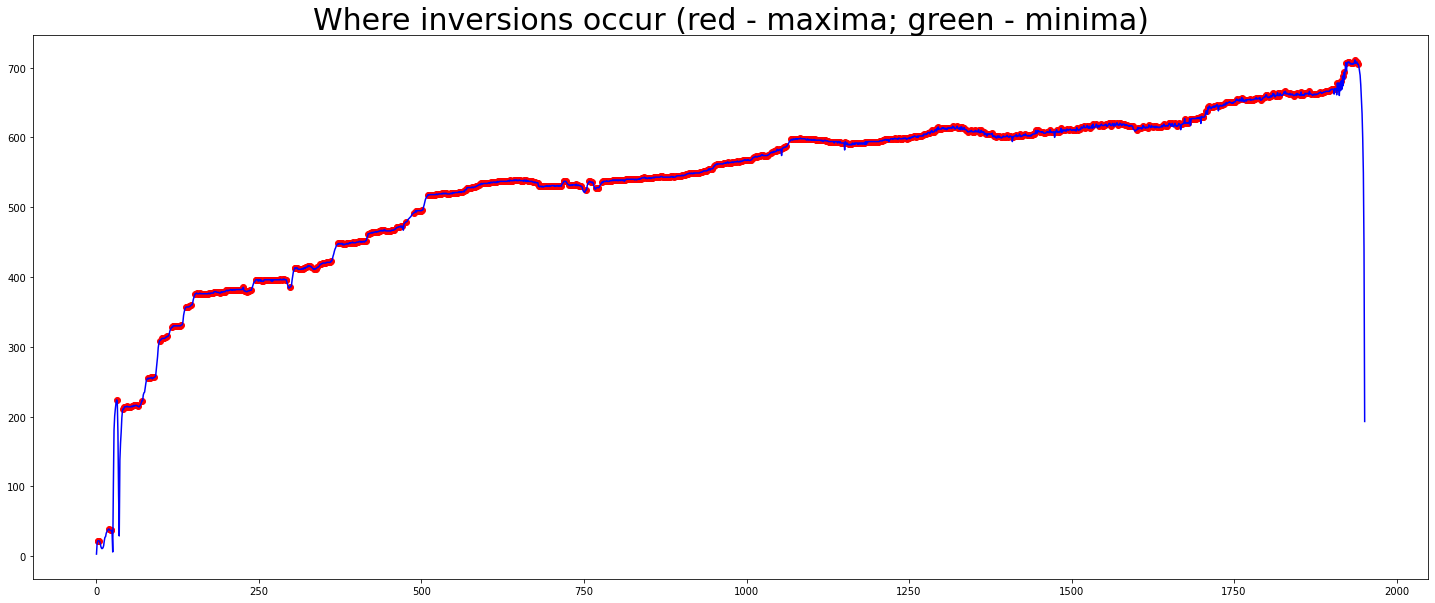

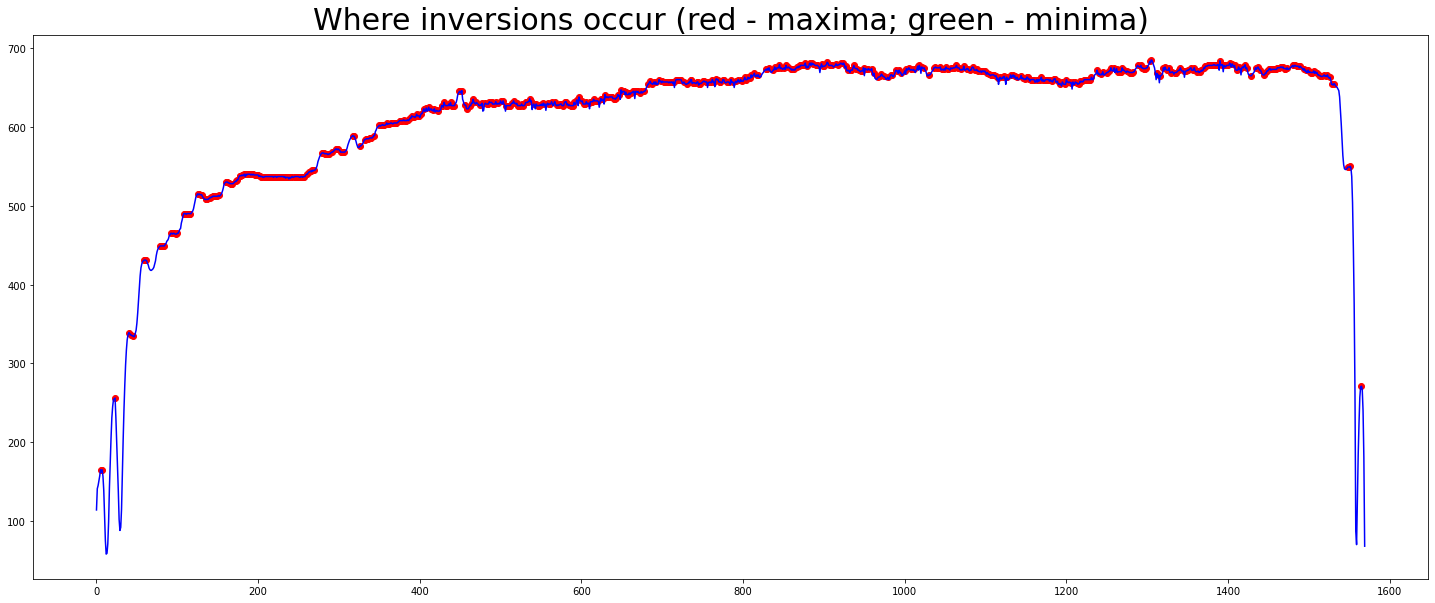

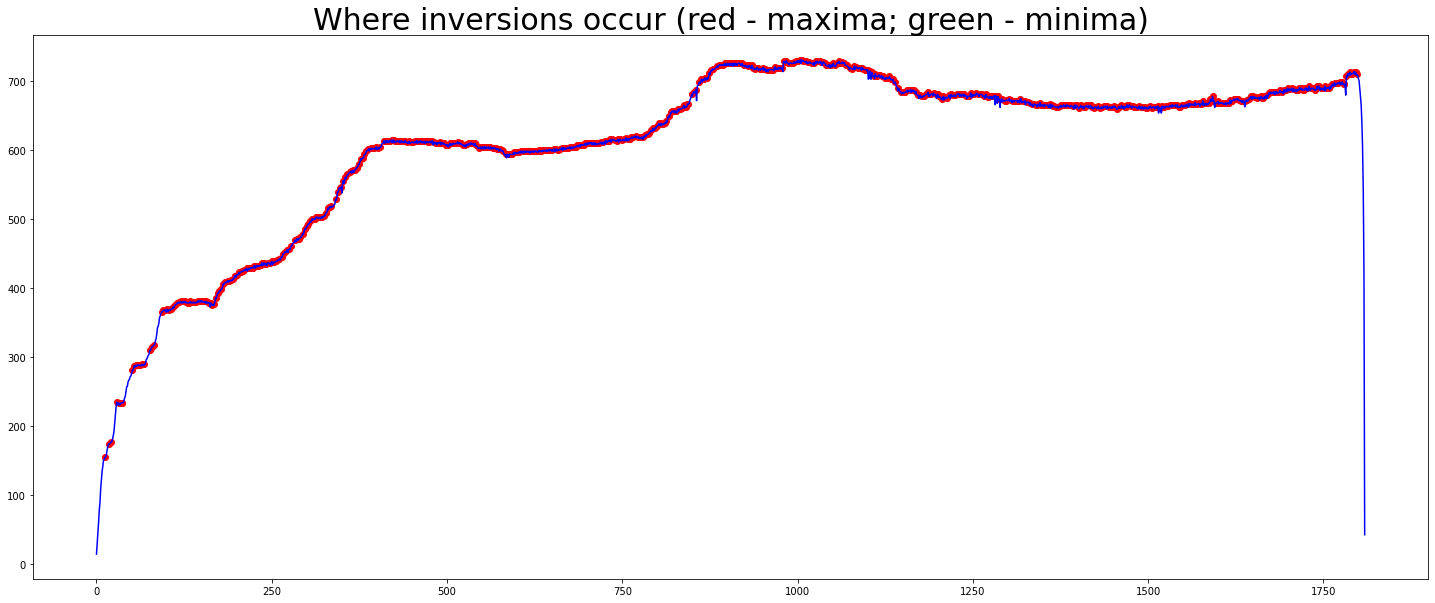

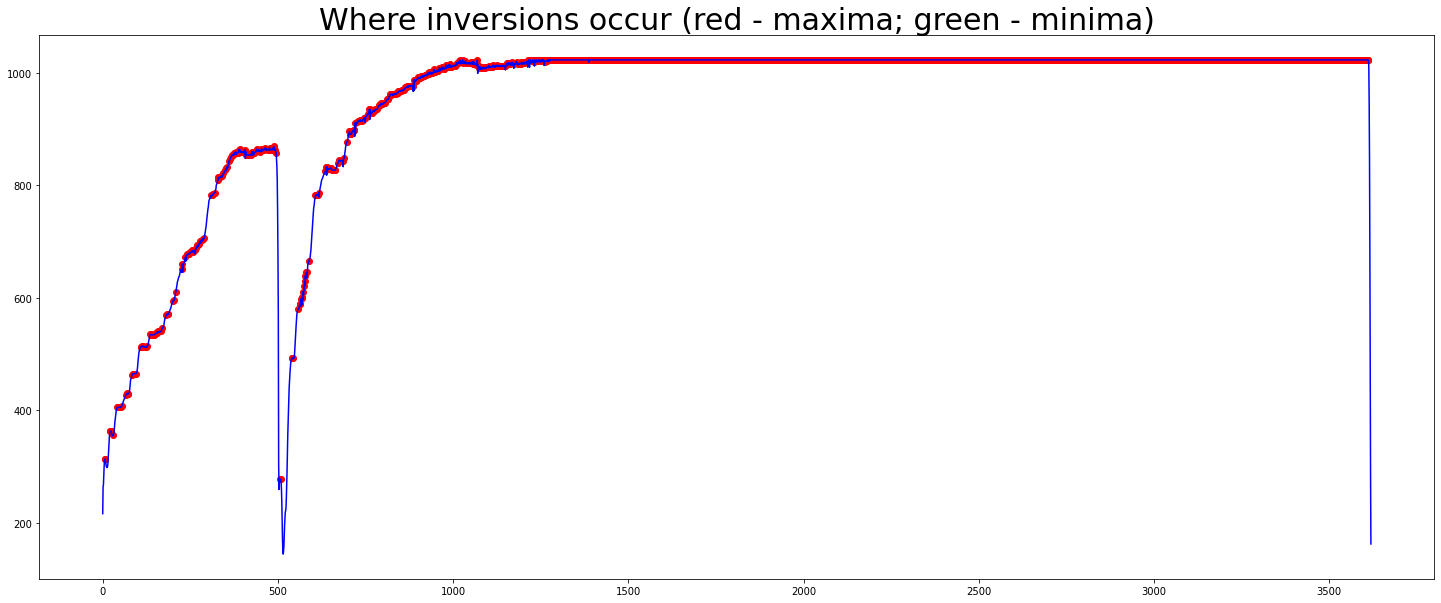

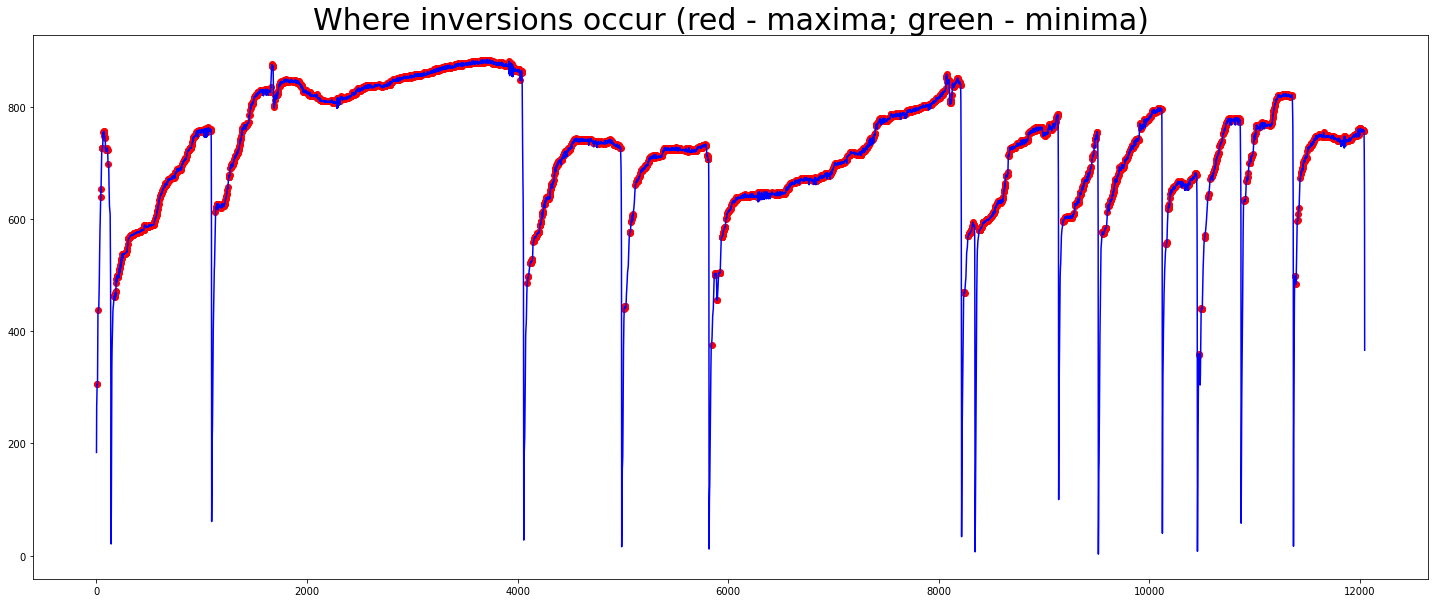

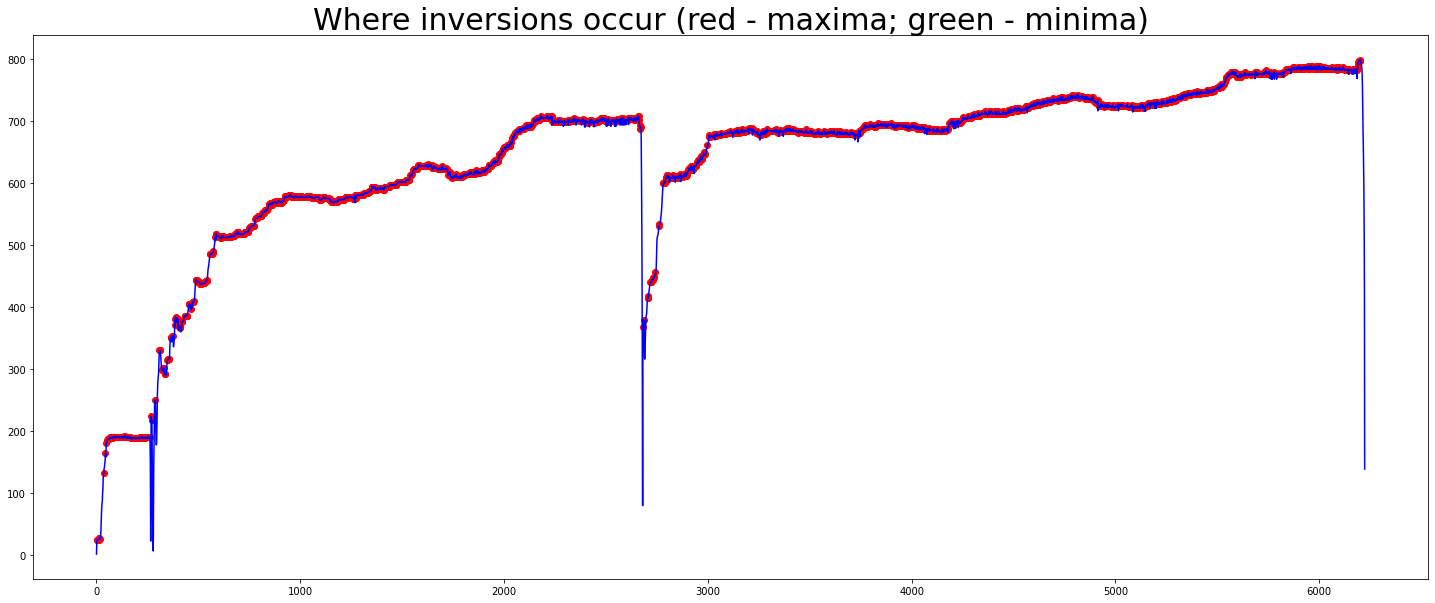

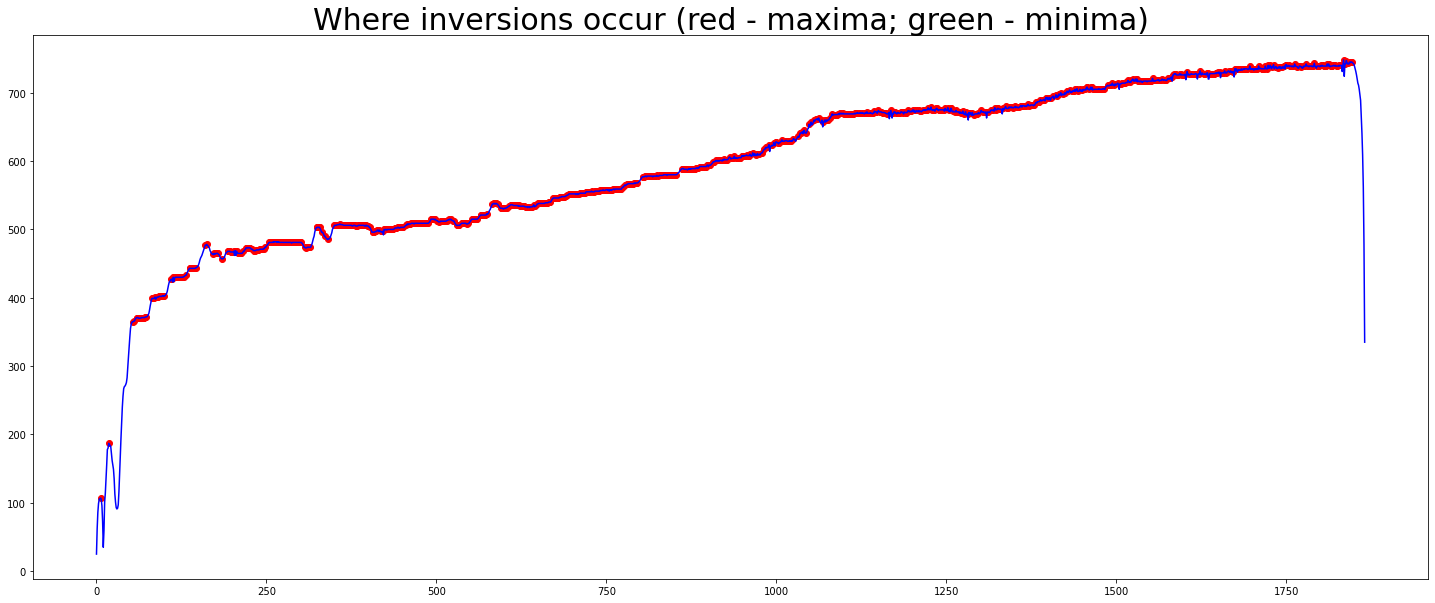

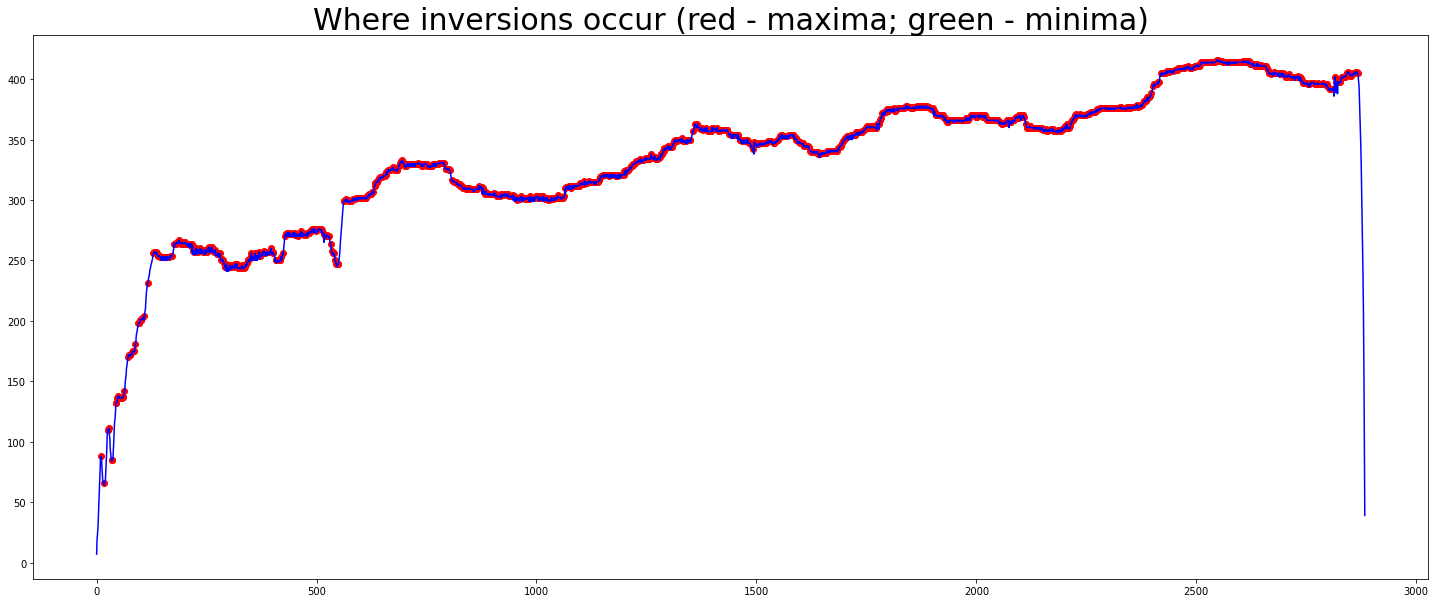

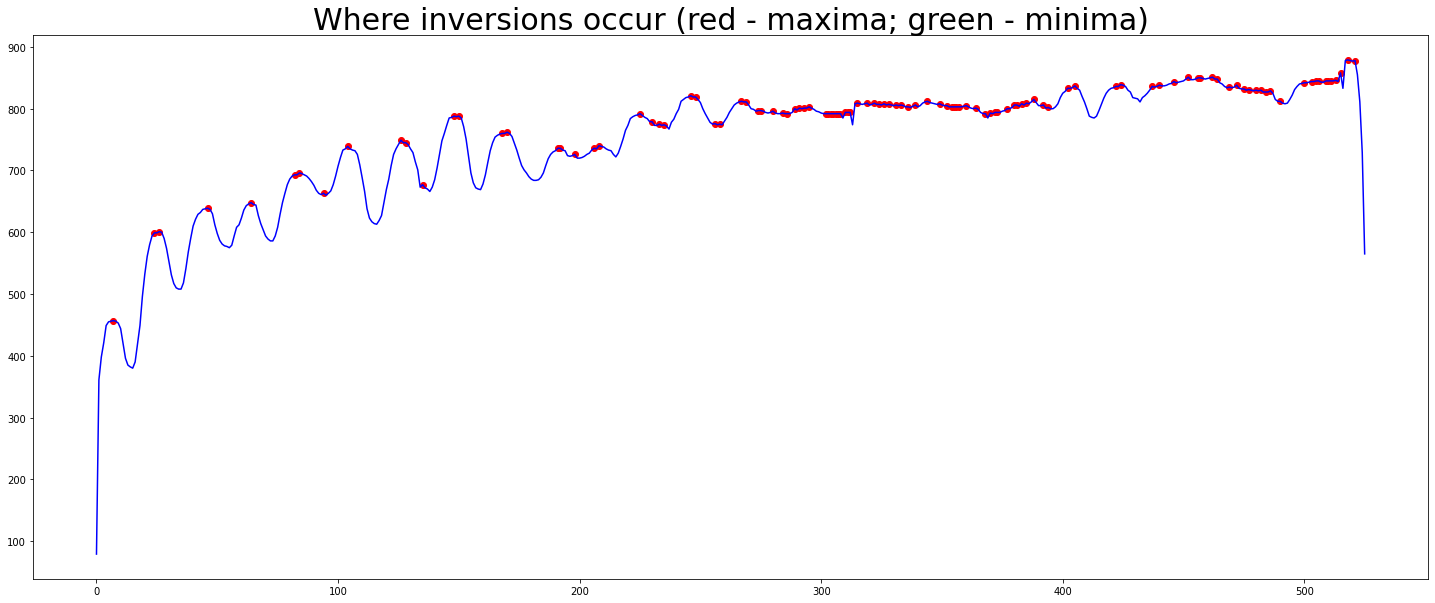

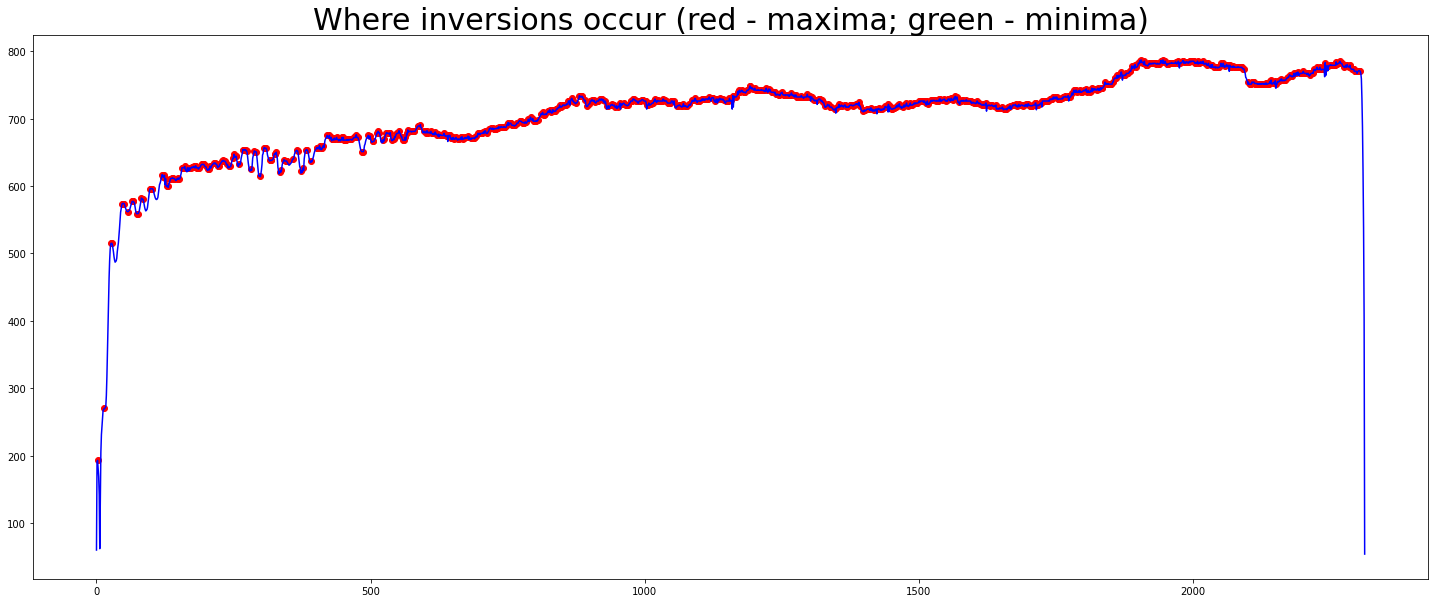

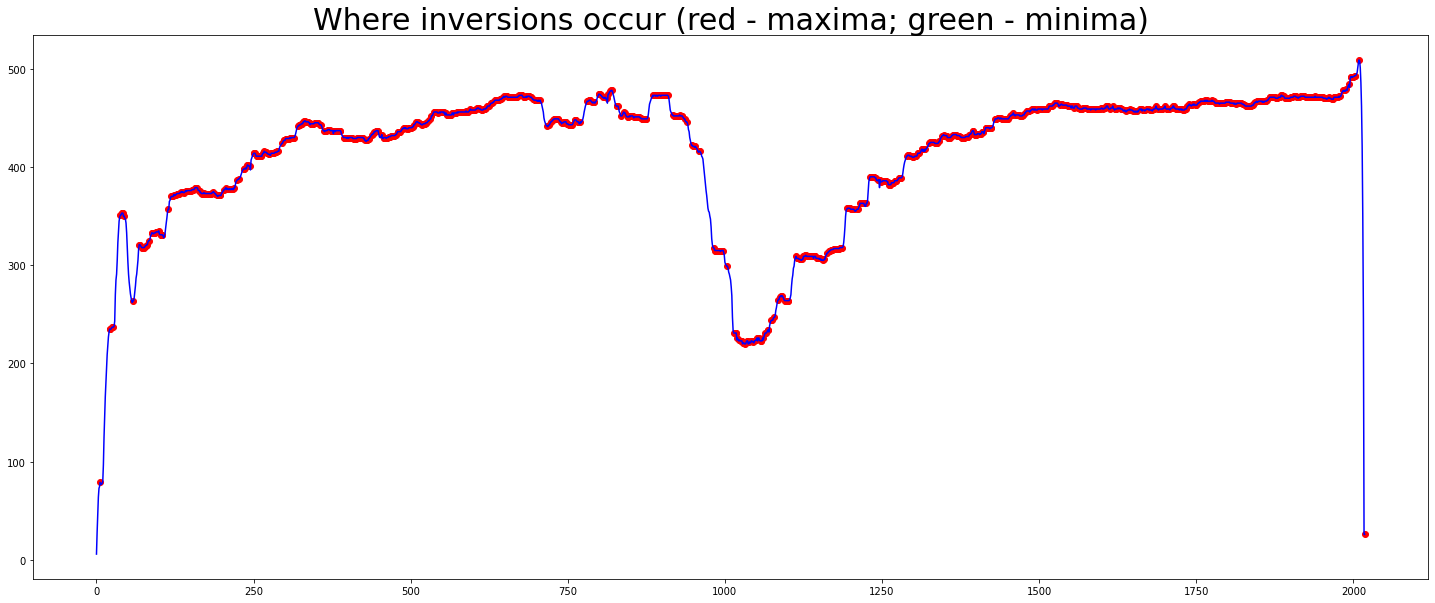

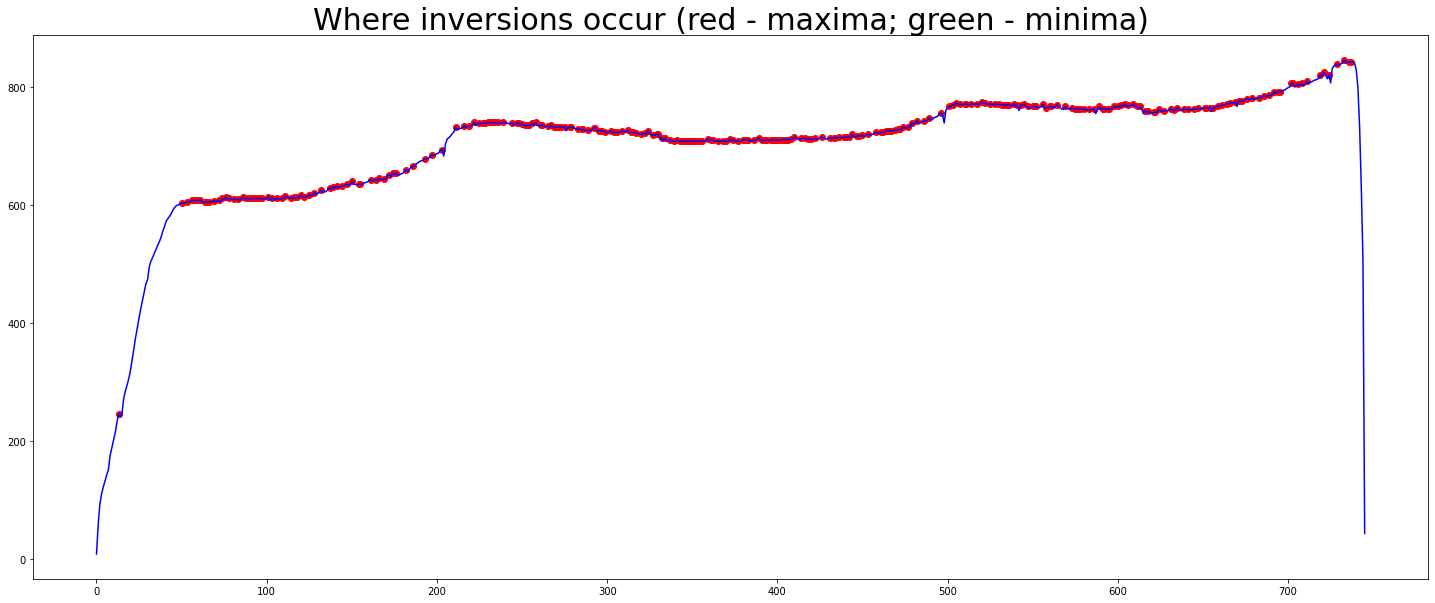

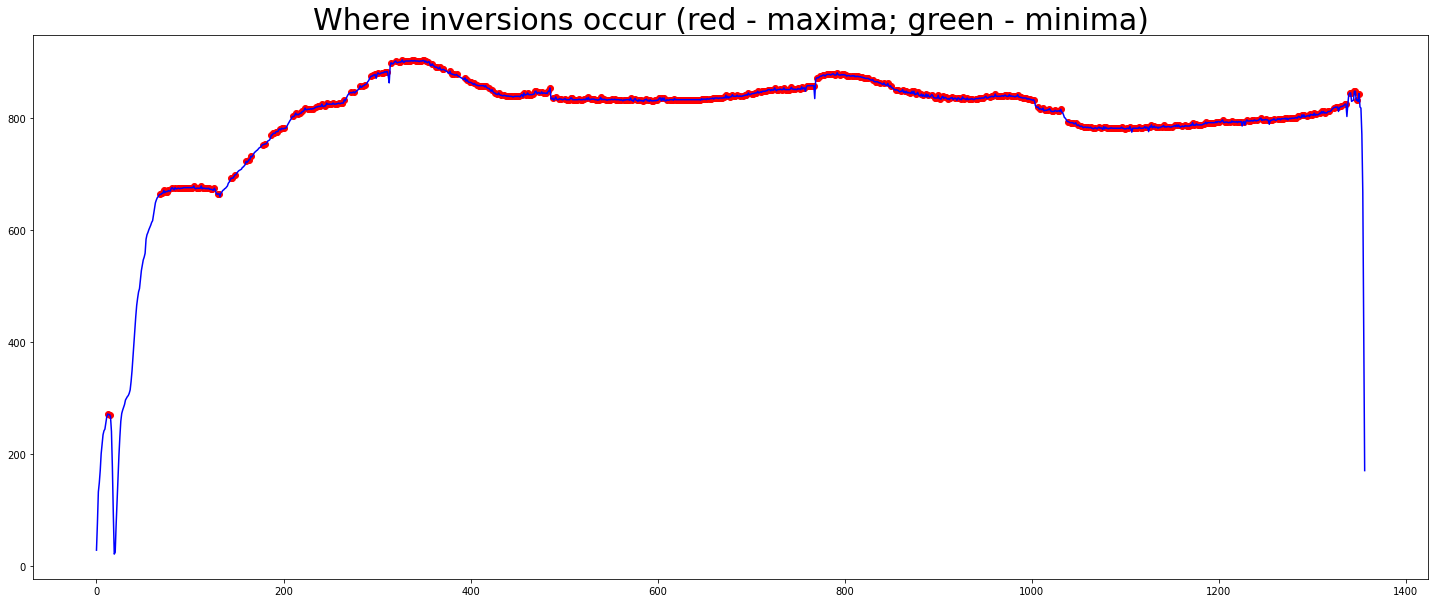

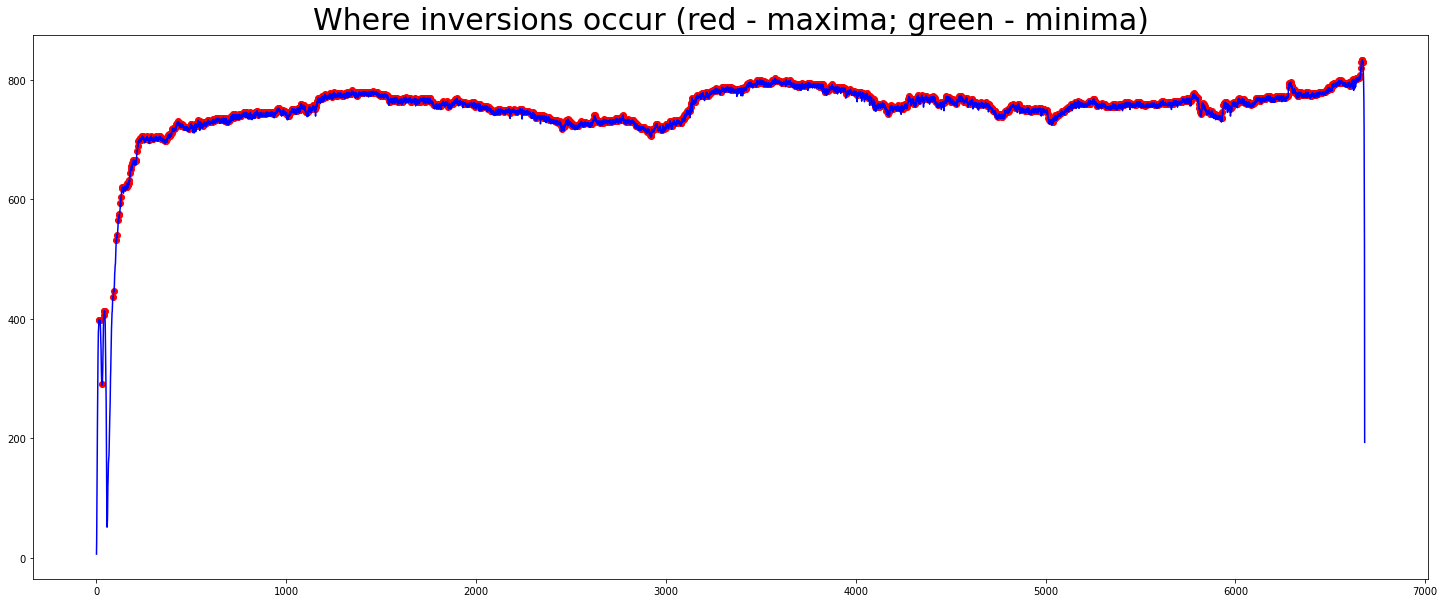

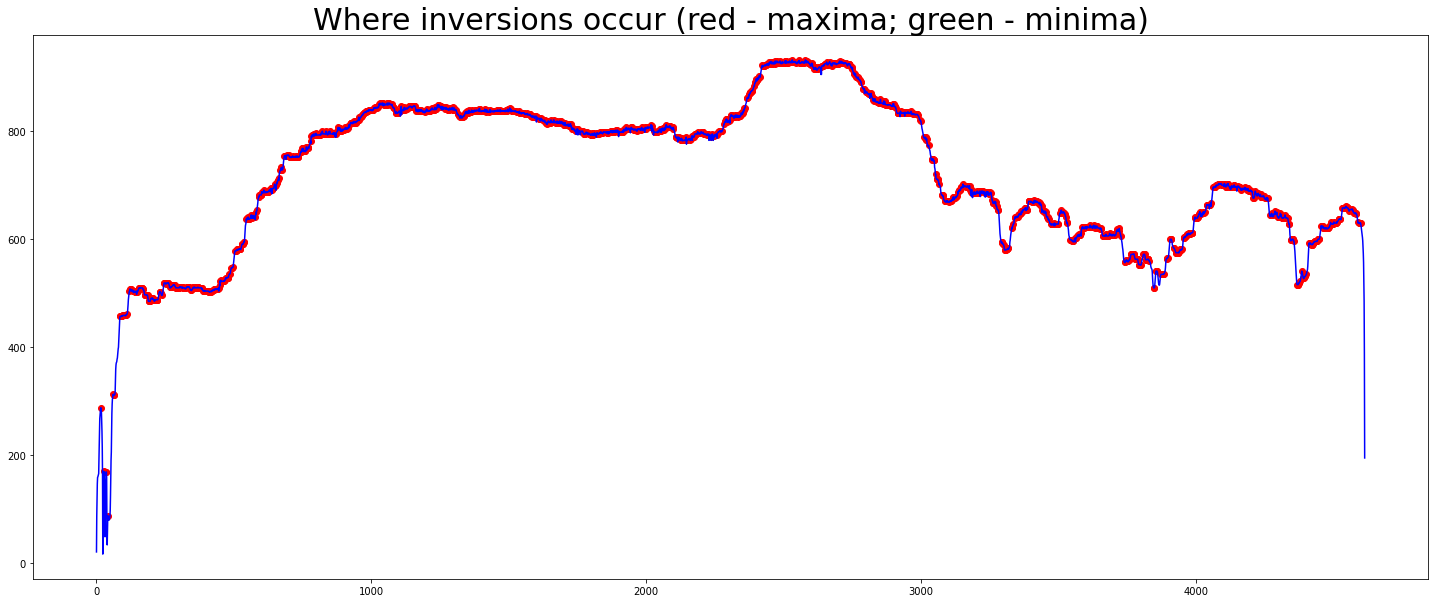

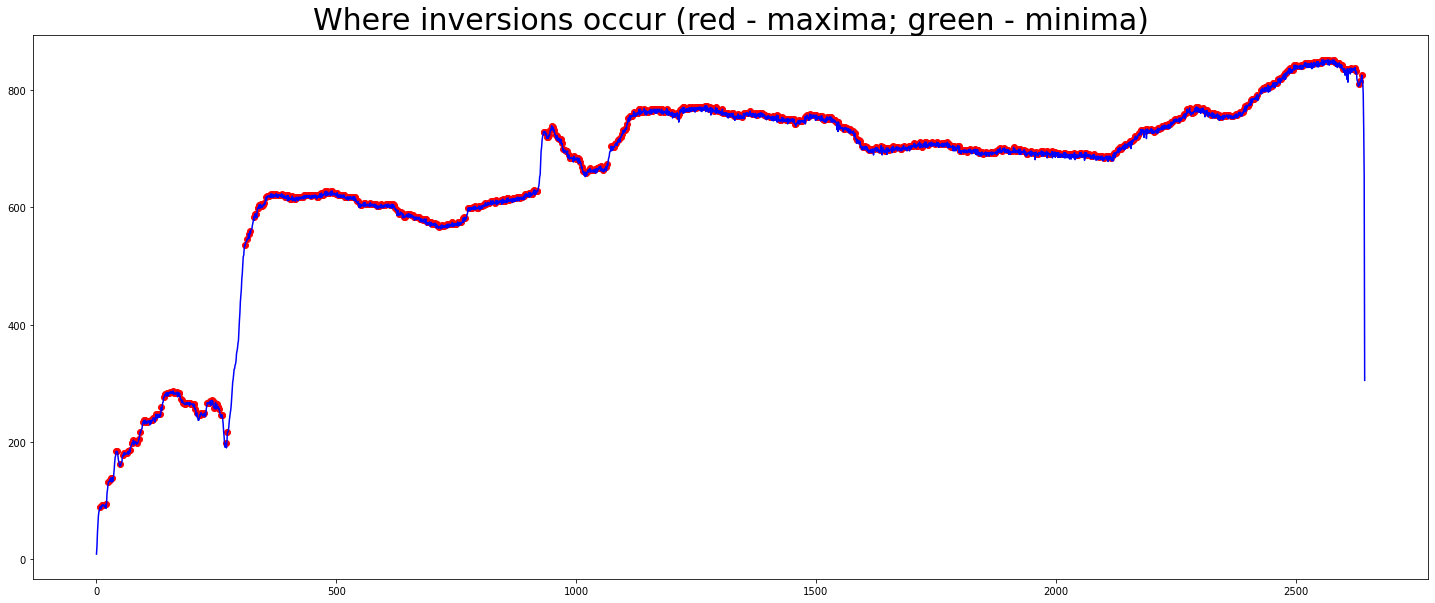

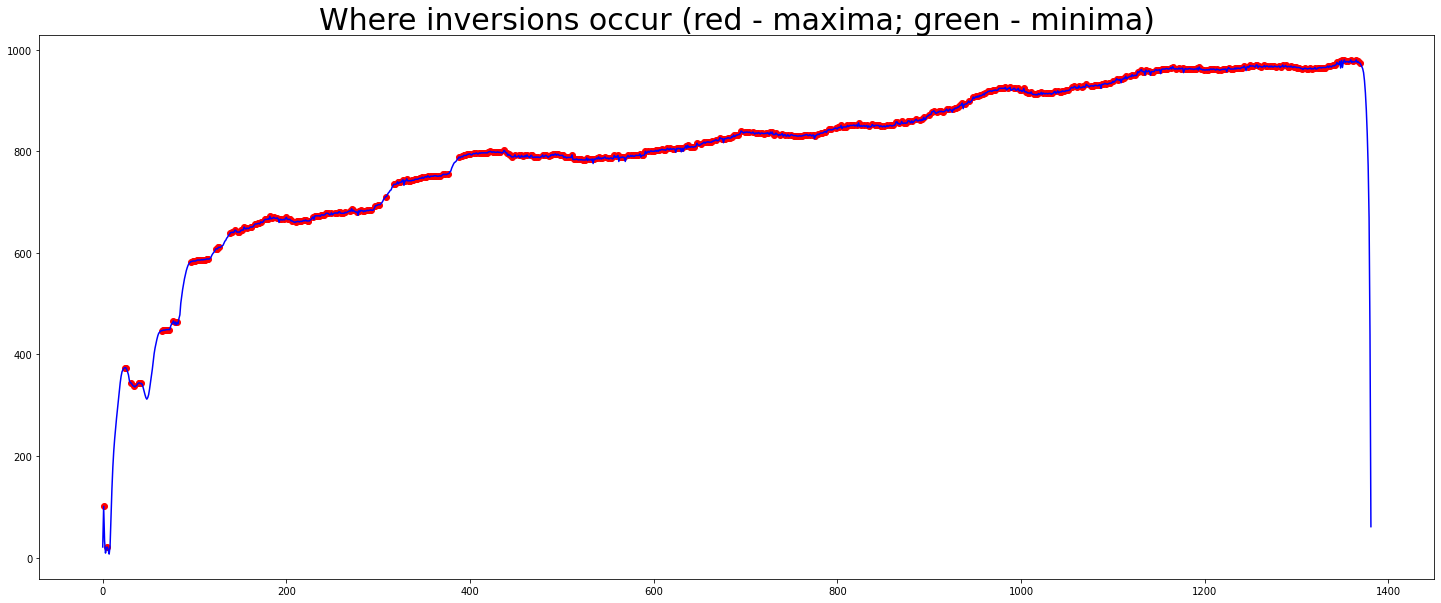

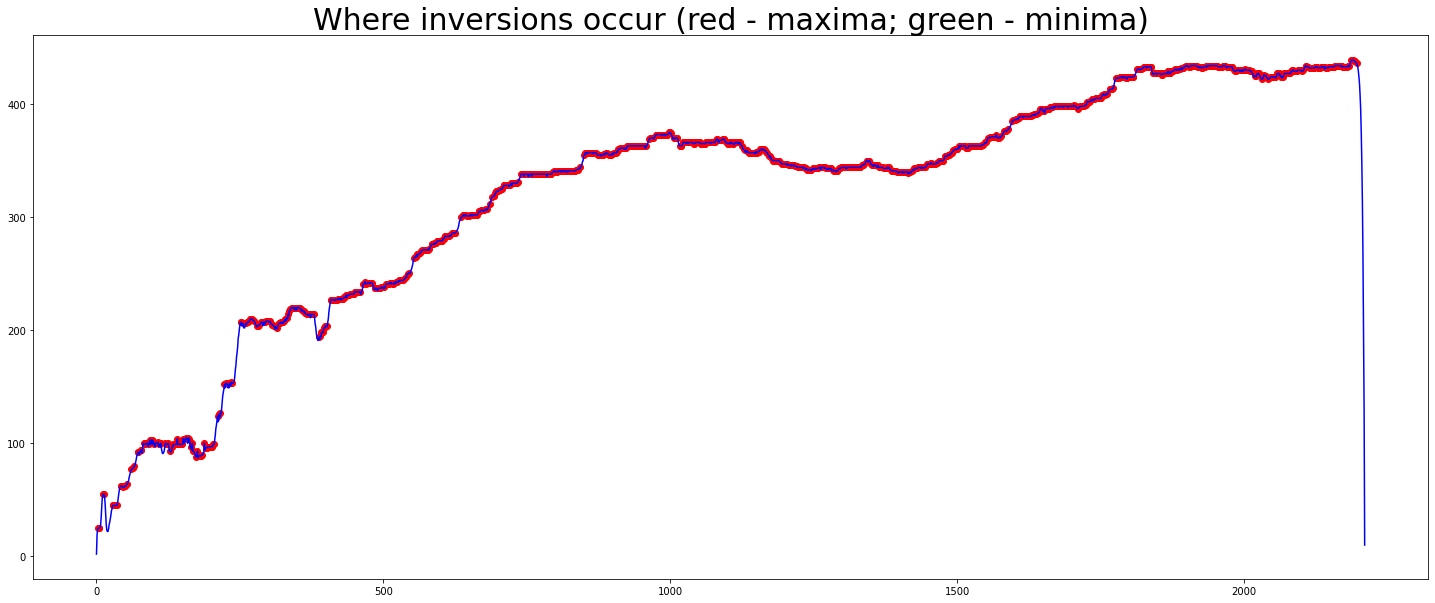

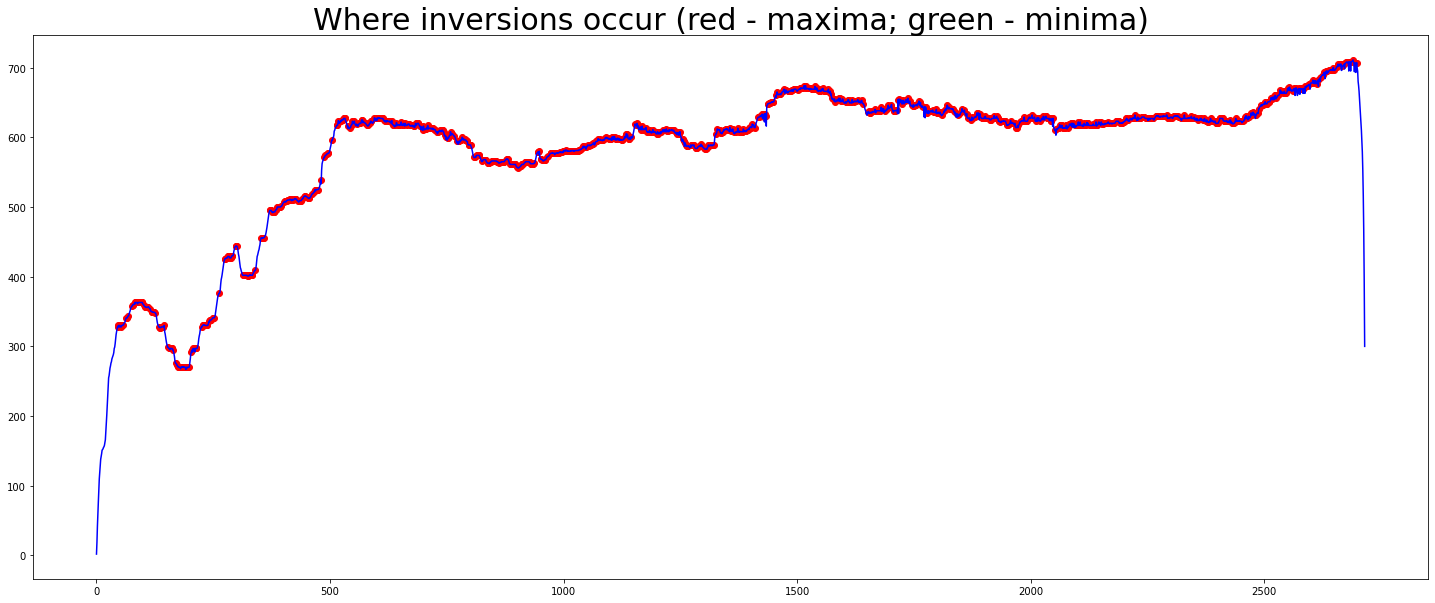

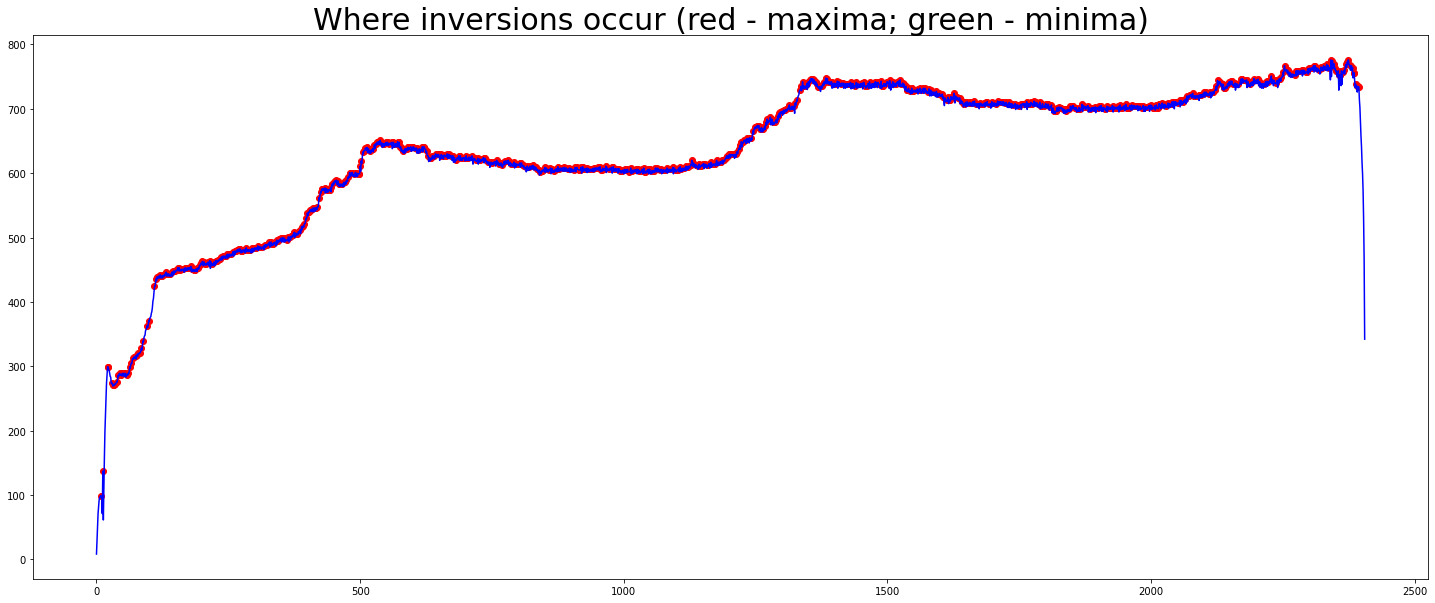

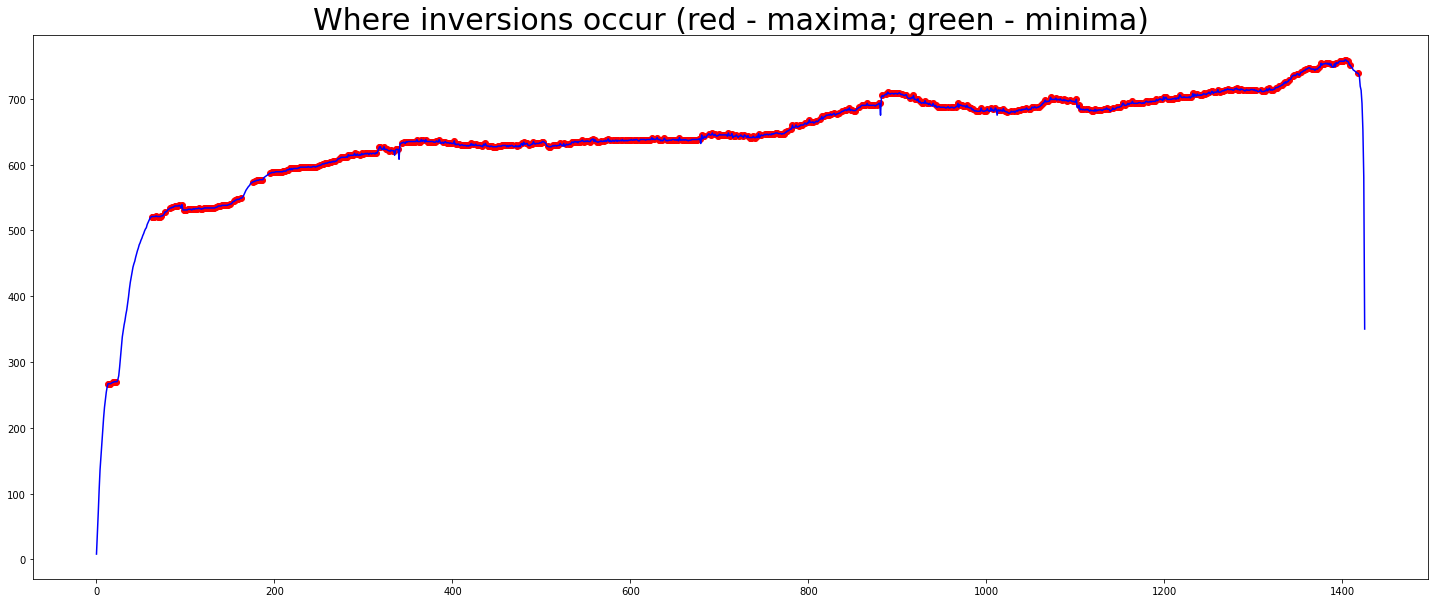

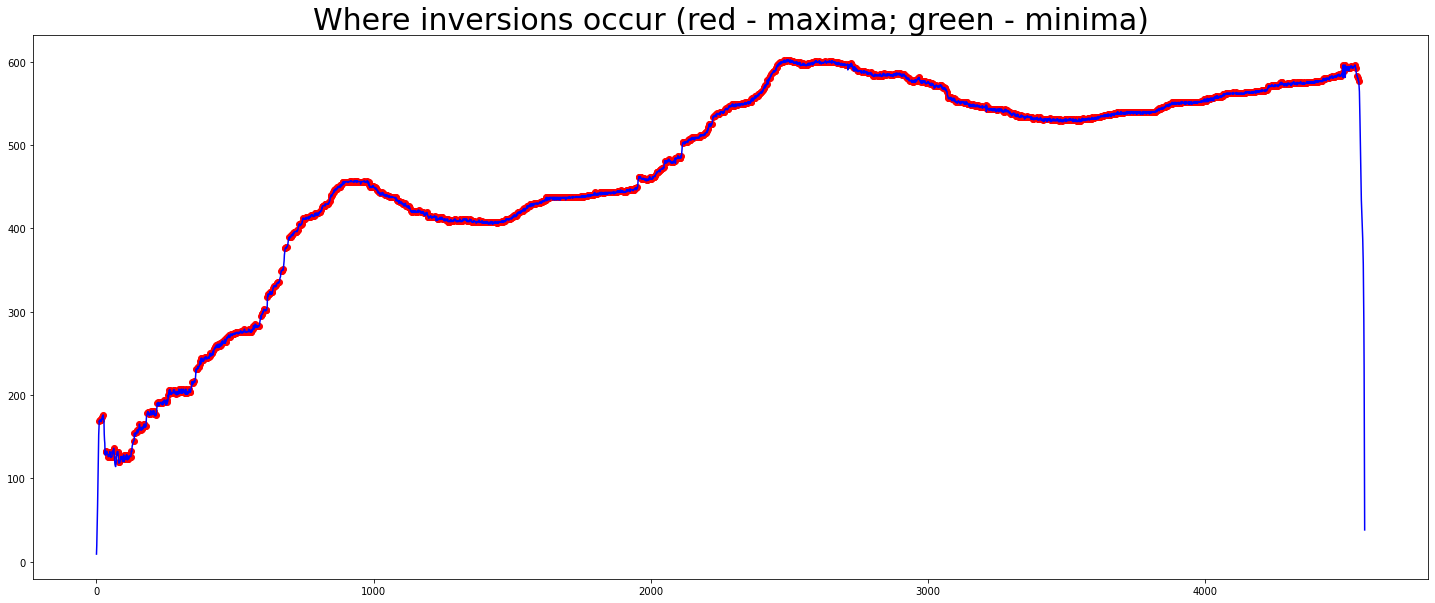

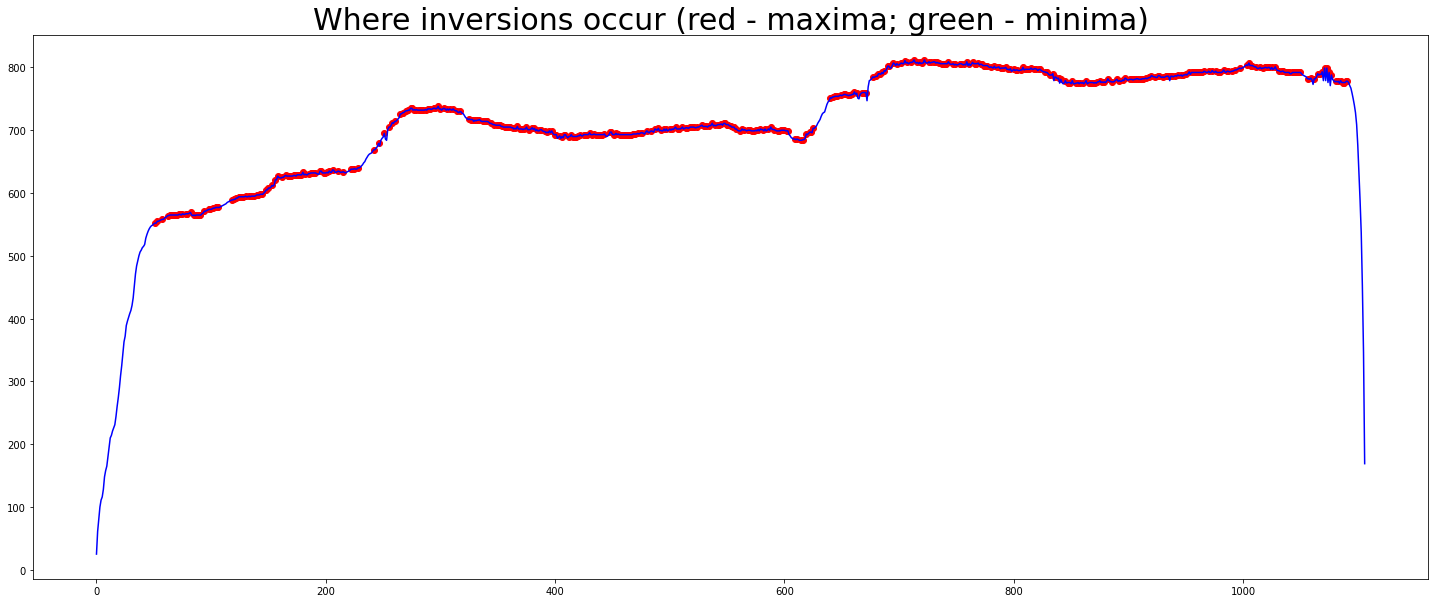

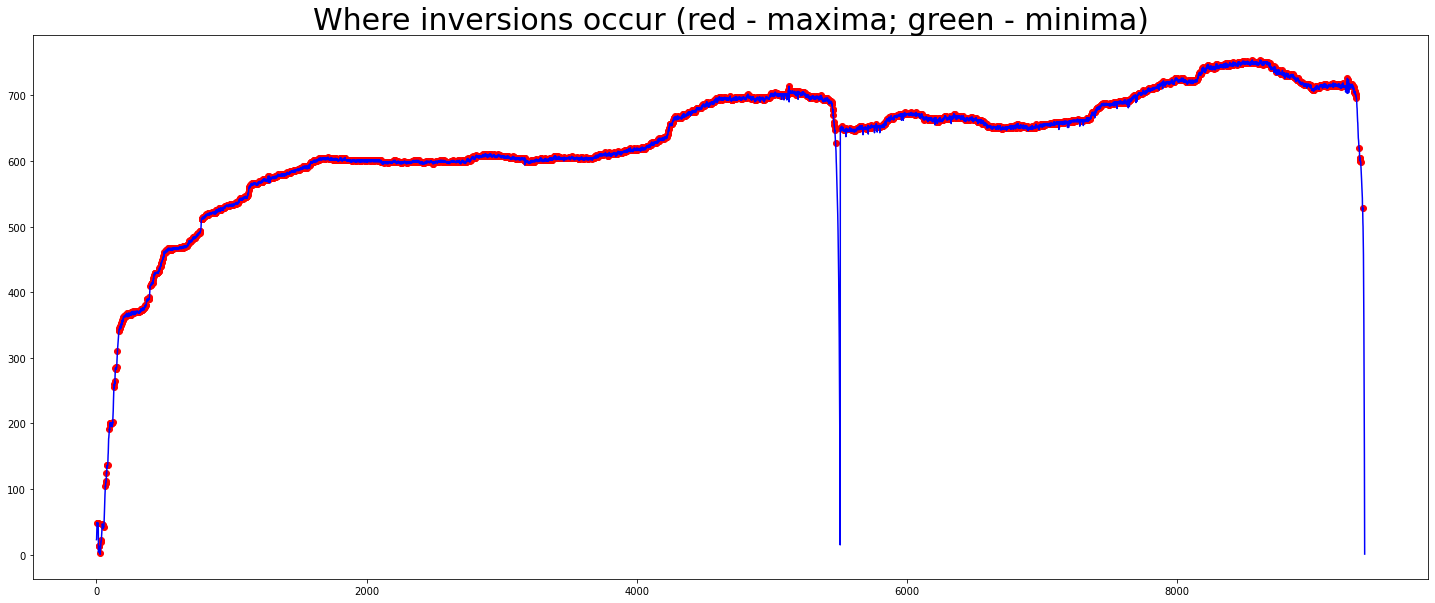

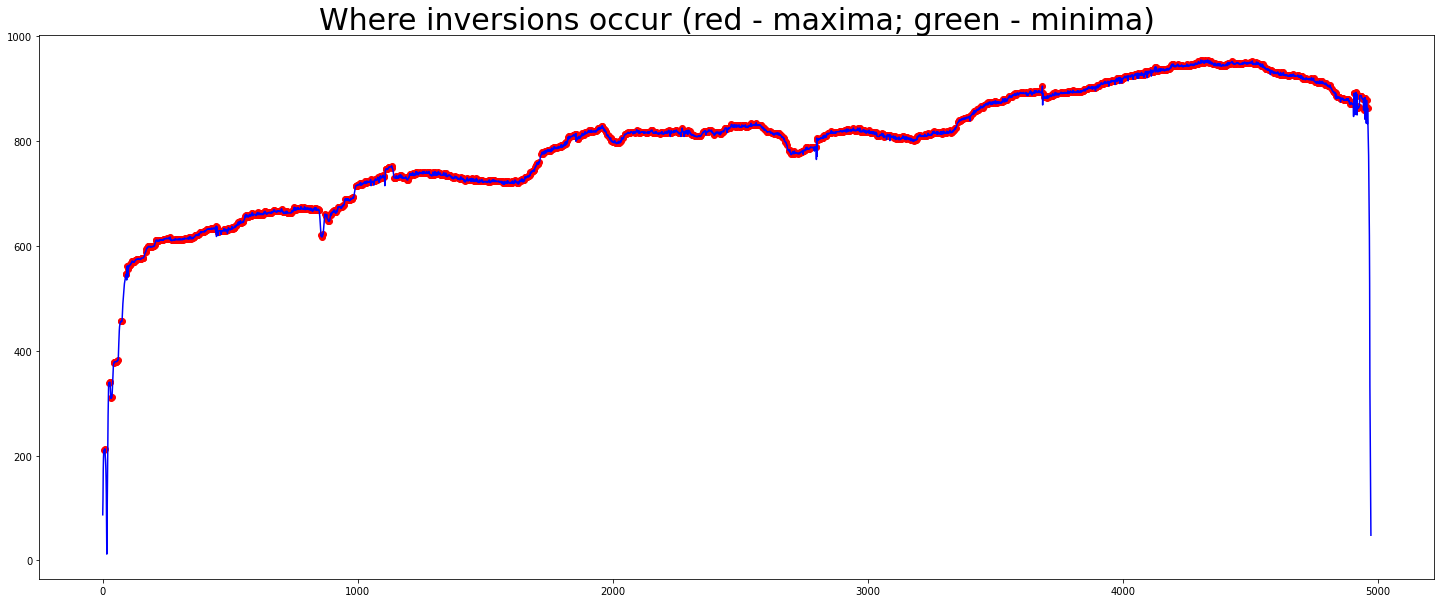

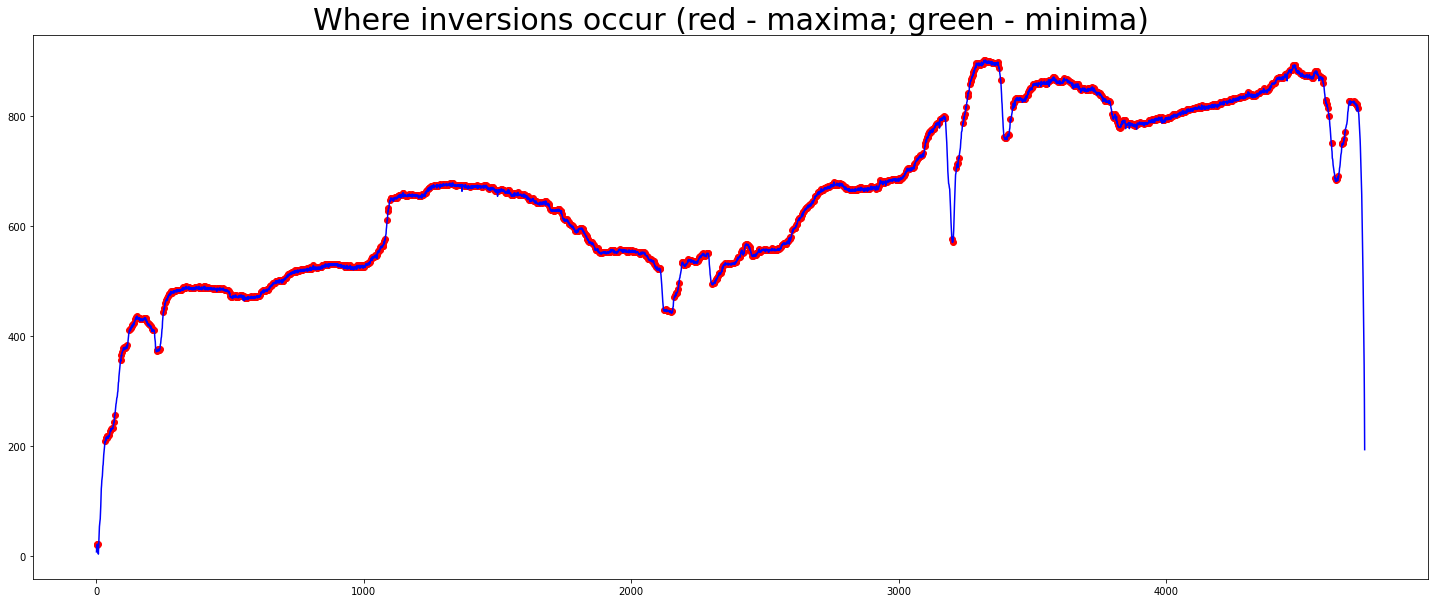

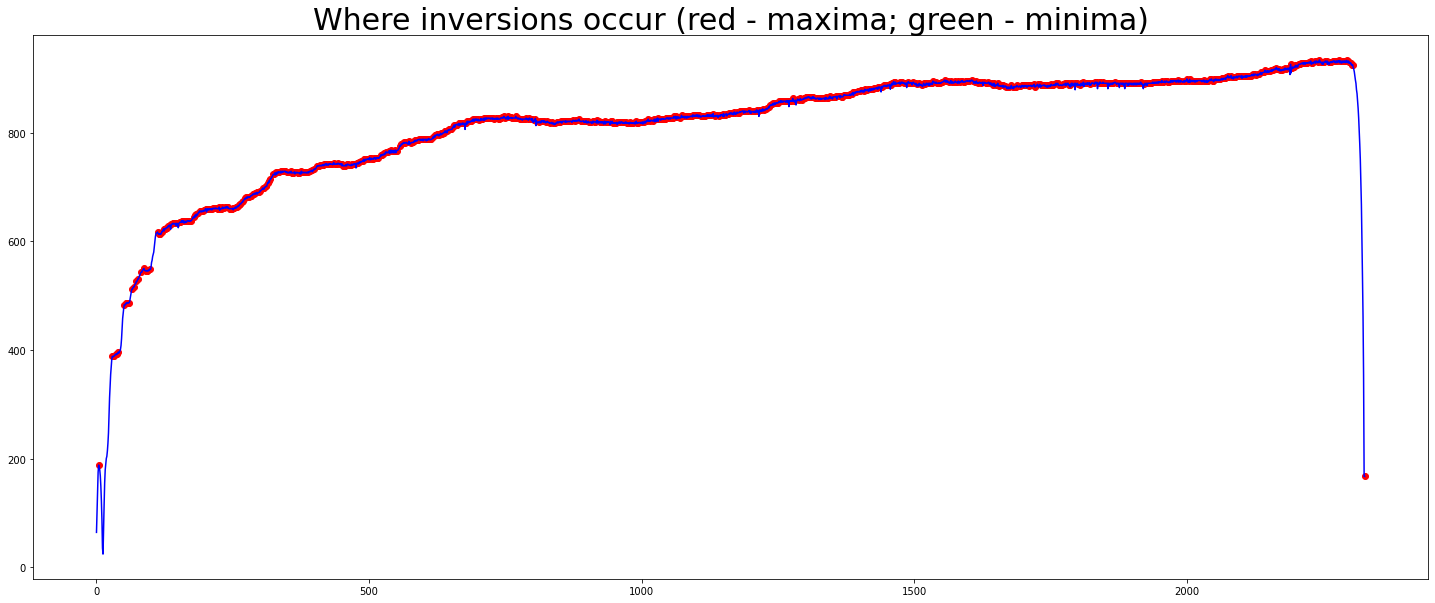

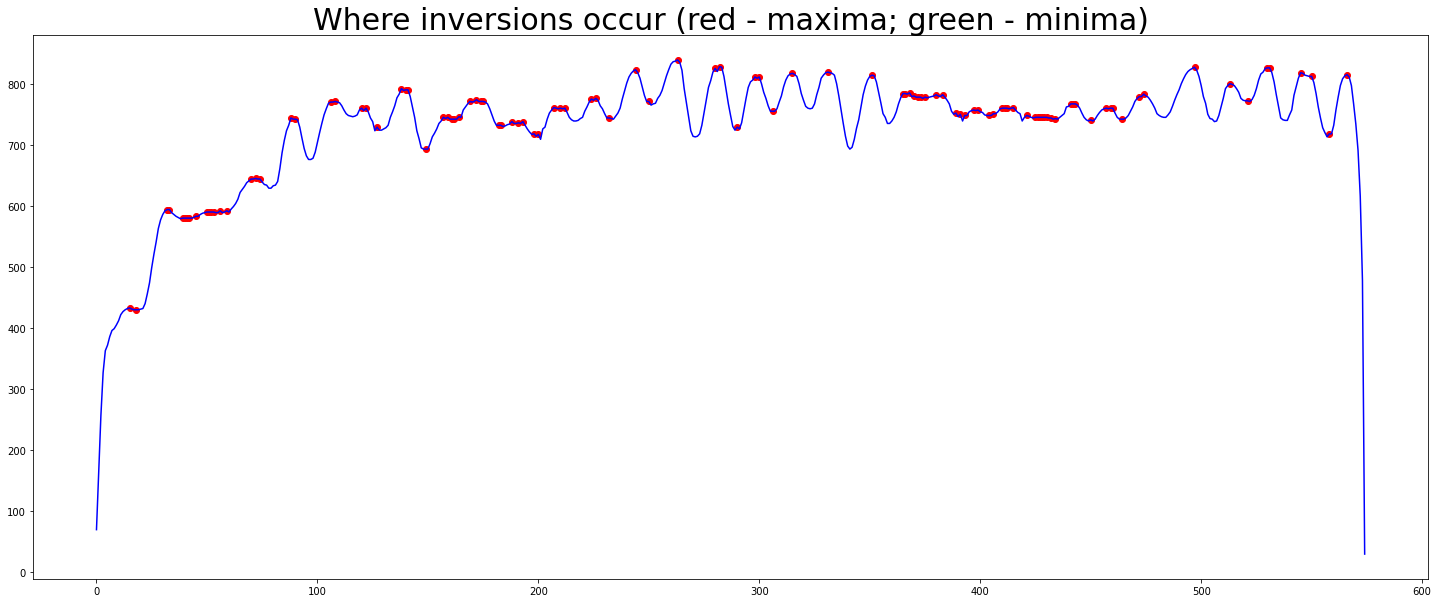

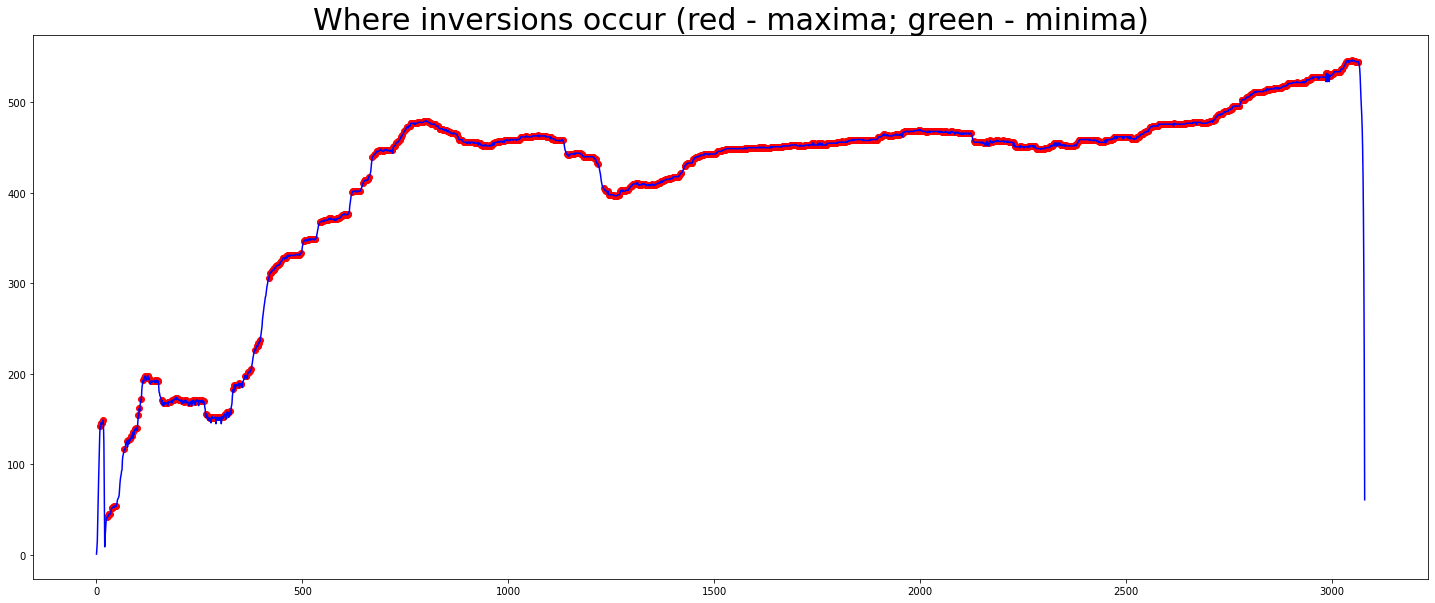

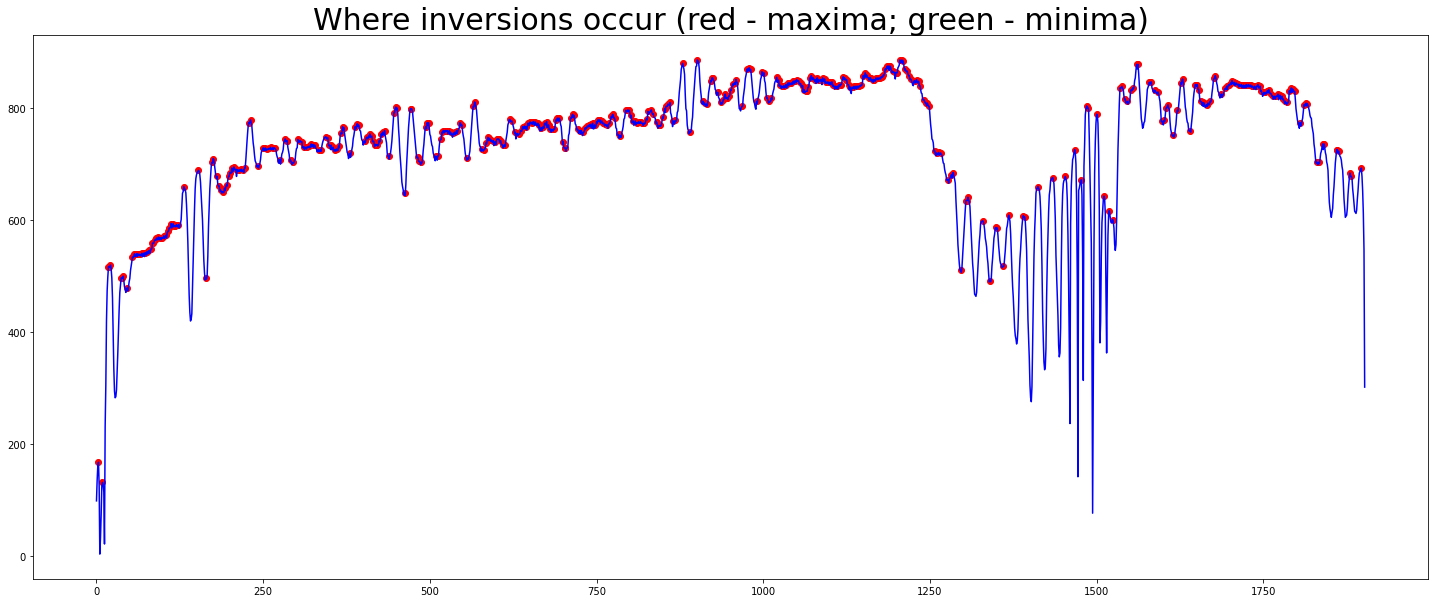

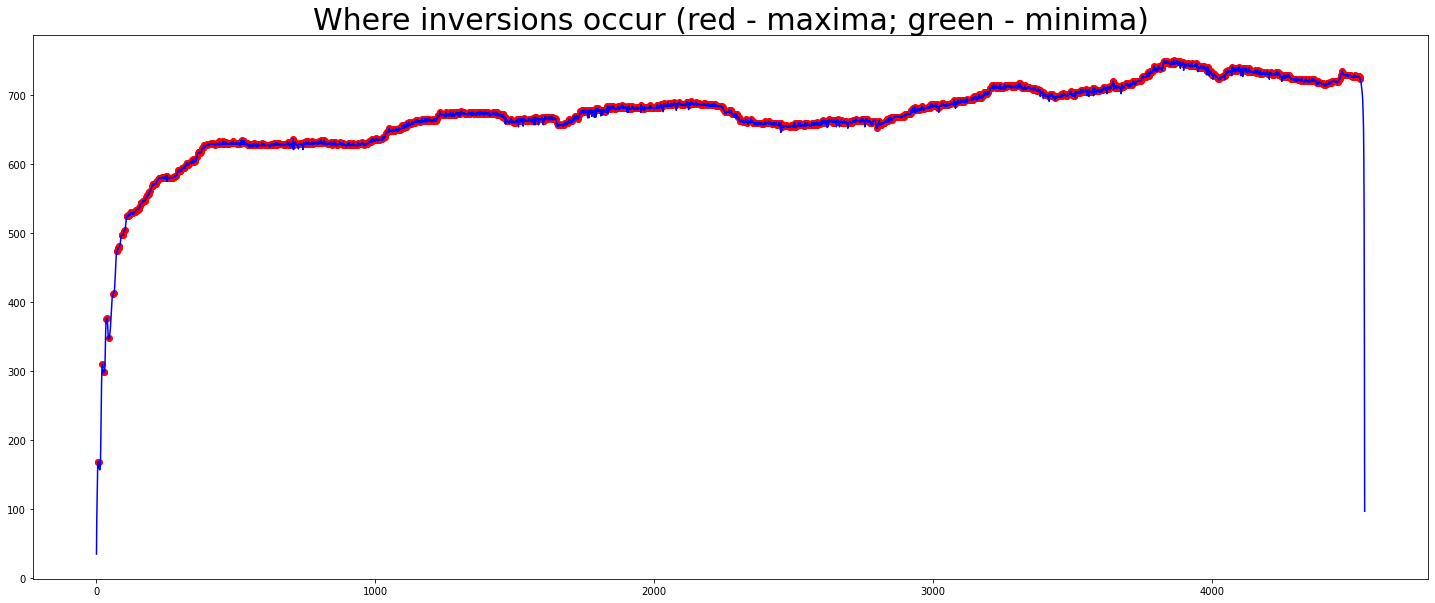

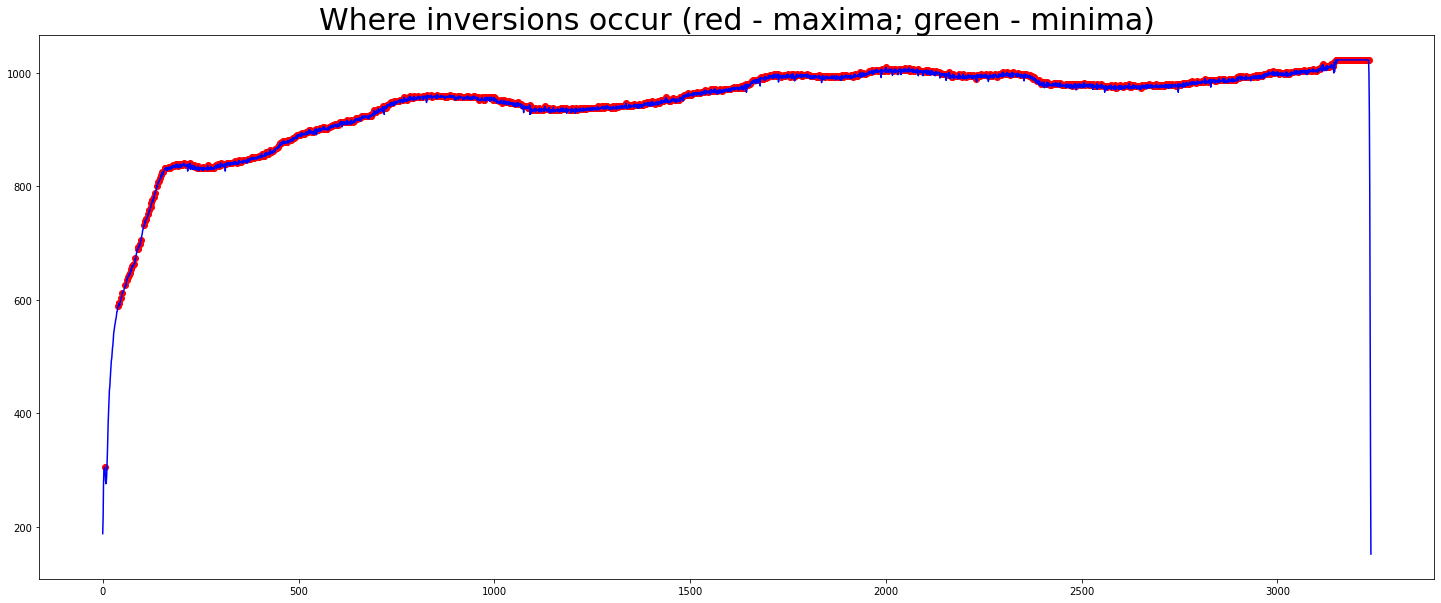

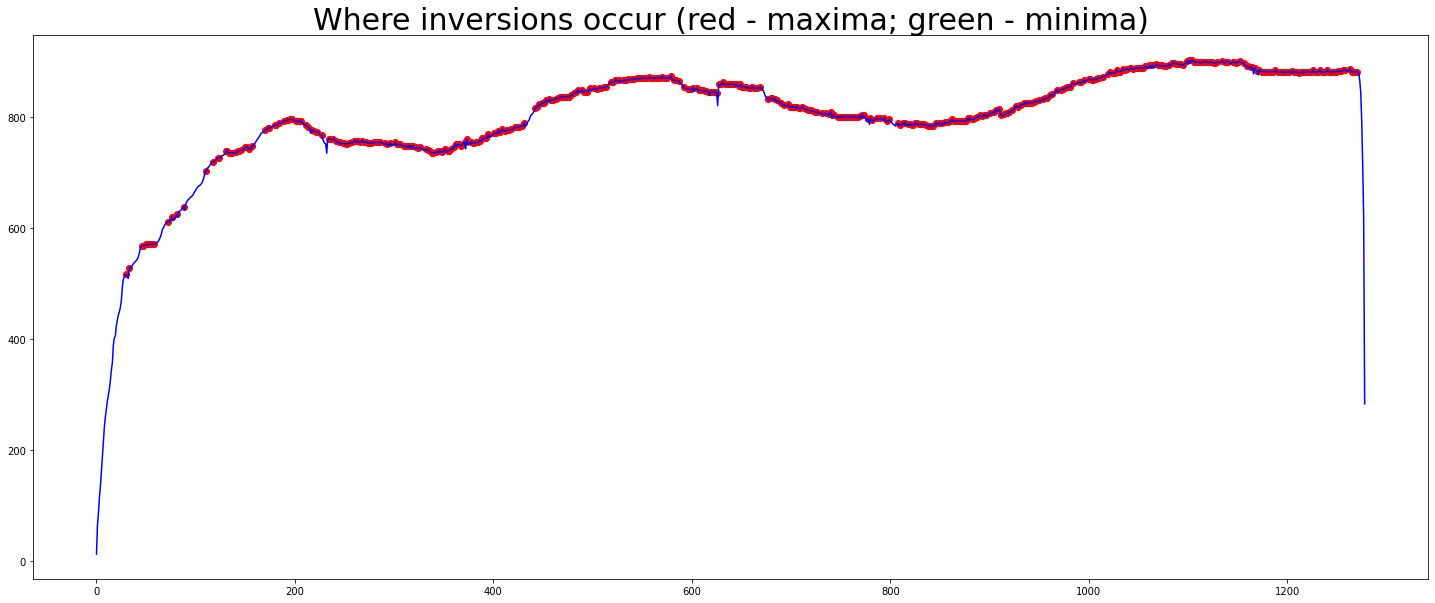

In [ ]:
for filename in patientFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    static_df, dynamic_df = staticDynamicSplit(df)
    static_pressure = static_df[3]
    dynamic_pressure = dynamic_df[3]
    static_time = static_df[5]

    static_maxima = argrelextrema(np.array(static_pressure), np.greater_equal)
    extrema_length.append(len(static_maxima[0]))
    extrema_rate.append(len(static_maxima[0])/(max(static_time) - min(static_time)))
    category.append("Patient")
    plt.figure(figsize = (25, 10))
    plt.plot(static_pressure, 'b')
    for i in static_maxima: 
        plt.scatter(i, static_pressure[i], marker = 'o', c = 'r')
    plt.title('Where inversions occur (red - maxima; green - minima)', fontsize = 30)
    print(len(static_maxima[0]))

Text(0.5, 1.0, 'Extrema rate')

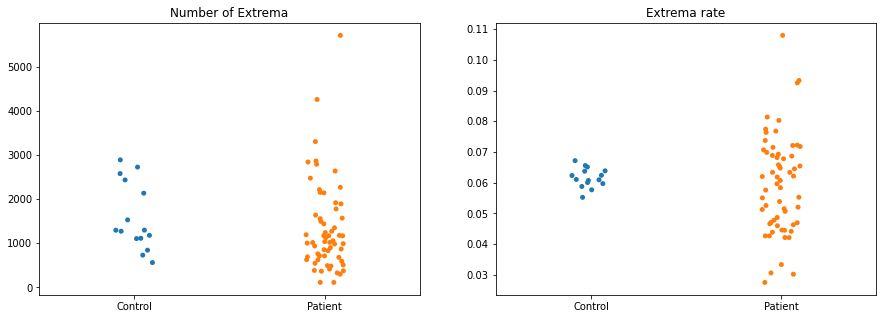

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.stripplot(x = category, y = extrema_length)
plt.title("Number of Extrema")
plt.subplot(1, 2, 2)
sns.stripplot(x = category, y = extrema_rate)
plt.title("Extrema rate")

## Radius and Angle

In [ ]:
Rs = []
thetax = []
thetay = []
category = []
for filename in controlFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    x = df[df[6] == 0][0]
    y = df[df[6] == 0][1]
    x0 = float(x[0])
    y0 = float(y[0])
    R = np.array([((x - x0)**2 + (y - y0)**2) ** (1/2)]).T
    Rs.append(R)
    category.append('Control')

for filename in controlFiles: 
    df = pd.read_csv(filename, sep = ';', header = None)
    x = df[df[6] == 0][0]
    y = df[df[6] == 0][1]
    x0 = x[0]
    y0 = y[0]
    R = np.array([((x - x0)**2 + (y - y0)**2) ** (1/2)]).T
    Rs.append(R[:, 0])
    print (len(np.array((y - y0)/R[:, 0])))
    xT = math.asin(np.array((y - y0)/R[:, 0]))
    thetax.append(xT)
    yT = math.asin((x - x0)/R[:, 0])
    thetax.append(yT)
    category.append('Patient')

2578


TypeError: only size-1 arrays can be converted to Python scalars

## Prep Sample Drawings for Paper

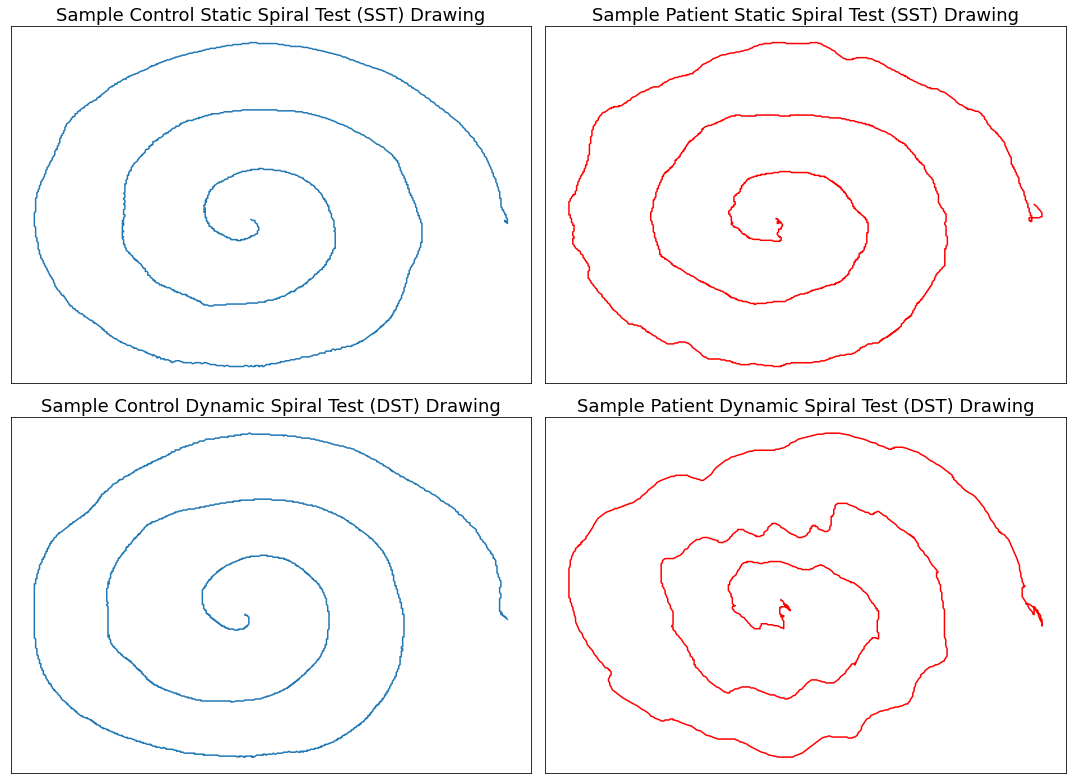

In [ ]:
patient_df = pd.read_csv(patientFiles[0], sep = ';', header = None)
static_patient_df, dynamic_patient_df = staticDynamicSplit(patient_df)

control_df = pd.read_csv(controlFiles[0], sep = ';', header = None)
static_control_df, dynamic_control_df = staticDynamicSplit(control_df)

plt.figure(figsize = (15, 11), tight_layout = True)
plt.subplot(2, 2, 1)
plt.plot(static_control_df[0], static_control_df[1])
plt.title('Sample Control Static Spiral Test (SST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(2, 2, 2)
plt.plot(static_patient_df[0], static_patient_df[1], 'r')
plt.title('Sample Patient Static Spiral Test (SST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(2, 2, 3)
plt.plot(dynamic_control_df[0], dynamic_control_df[1])
plt.title('Sample Control Dynamic Spiral Test (DST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.subplot(2, 2, 4)
plt.plot(dynamic_patient_df[0], dynamic_patient_df[1], 'r')
plt.title('Sample Patient Dynamic Spiral Test (DST) Drawing', fontsize = 18)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.savefig('paper_figures/sample_drawings.png')

## Prep pressure signal component breakdown figure for paper

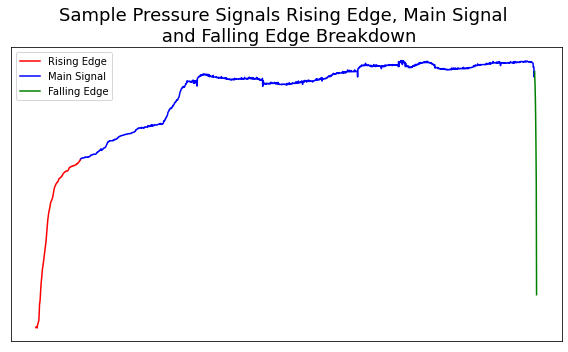

In [ ]:
from feature_functions import *
df1 = pd.read_csv('/work/ParkinsonHW/H_P000-0014.txt', sep = ';', header = None)
static_df1, dynamic_df1 = staticDynamicSplit(df1)
static_pressure1 = static_df1[3]
risingIndex1, fallingIndex1 = mainSignalThreshold(static_pressure1)

plt.figure(figsize = (8, 5), tight_layout = True)

plt.plot(static_pressure1[:risingIndex1], 'r', label = 'Rising Edge')
plt.plot(static_pressure1[risingIndex1:fallingIndex1], 'b', label = 'Main Signal')
plt.plot(static_pressure1[fallingIndex1-1:], 'g', label = 'Falling Edge')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.title('Sample Pressure Signals Rising Edge, Main Signal \n and Falling Edge Breakdown', fontsize = 18)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Pressure Exerted on Surface')

plt.savefig('paper_figures/sample_pressure_breakdown.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54ea7590-1f30-42ee-b9c1-c929b94e3f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>